**1. Import common packages**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Reading in all the data

In [ ]:
# Read in all csvs
vaers_data = pd.read_csv('VAERSDATA.csv', header=None, low_memory=False)
vaers_symptoms = pd.read_csv('VAERSSYMPTOMS.csv', header=None)
vaers_vax = pd.read_csv('VAERSVAX.csv', header=None)
birth_defect = pd.read_csv('BIRTH_DEFECT.csv', header=None)

3.Data Cleaning and Manipulation

In [ ]:
# Clean up vaers_data
vaers_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,916600,TX,33.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,NaN,NaN,NaN,Pcn and bee venom
1,916601,CA,73.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,"""Dairy"""
2,916602,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,NaN,NaN,Shellfish
3,916603,WA,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47.0,F,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,Na,Na,NaN,Na


In [ ]:
# Rename columns in the vaers data table to the appropriate labels
vaers_data = vaers_data.rename(columns = {0:'vaers_id',1:'state',2:'age_yrs',3:'sex',4:'died',5:'l_threat',6:'er_visit',7:'hospital',
                              8:'hospdays',9:'disable',10:'recovd',11:'vax_date',12:'onset_date',13:'numdays',14:'other_meds',
                              15:'cur_ill',16:'history',17:'allergies'})
# Dropping allergies, cur_ill, other_meds, er_visit, vax_date, onset_date, recovd, hospdays columns
vaers_data = vaers_data.drop(['allergies','cur_ill','other_meds','vax_date','onset_date','recovd','hospdays','er_visit'], axis=1)

In [ ]:
# Converting 'died' column to boolean
vaers_data['died'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.died != 1, 'died'] = 0

<ipython-input-5-e7489907a1c2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaers_data['died'].replace('Y',1, inplace=True)
<ipython-input-5-e7489907a1c2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vaers_data['died'].replace('Y',1, inplace=True)


In [ ]:
vaers_data['died'].value_counts()

,count
died,
0.0,32164
1.0,1957


In [ ]:
# Converting 'l_threat', 'hospital', and 'disable' columns to boolean
vaers_data['l_threat'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.l_threat != 1, 'l_threat'] = 0

vaers_data['hospital'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.hospital != 1, 'hospital'] = 0

vaers_data['disable'].replace('Y',1, inplace=True)
vaers_data.loc[vaers_data.disable != 1, 'disable'] = 0

<ipython-input-7-8857ae1de51f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaers_data['l_threat'].replace('Y',1, inplace=True)
<ipython-input-7-8857ae1de51f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vaers_data['l_threat'].replace('Y',1, inplace=True)
<ipython-input-7-8857ae1de51f>:5: Fu

In [ ]:
# Converting 'history' column to boolean based on set of possible input strings
no_hist = ['Comments: List of non-encoded Patient Relevant History: Patient Other Relevant History 1: None',
           'Medical History/Concurrent Conditions: No adverse event (No reported medical history)',
          'None', 'none', 'N/A', 'n/a', 'N/a', '', 'no', 'None.', 'NONE', 'No', 'None Known', 'None reported on consent form',
          'NO KNOWN', 'None reported', 'Not applicable', np.nan] # Changed np.NaN to np.nan
vaers_data.history.replace(no_hist, 0, regex=True, inplace=True)
vaers_data.loc[vaers_data.history != 0, 'history'] = 1

<ipython-input-8-74f4748b7e73>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaers_data.history.replace(no_hist, 0, regex=True, inplace=True)


In [ ]:
# Clean up vaers_symptoms
display(len(vaers_symptoms))
vaers_symptoms.head()

48110

,0,1,2,3,4,5
0,916600,Dysphagia,Epiglottitis,NaN,NaN,NaN
1,916601,Anxiety,Dyspnoea,NaN,NaN,NaN
2,916602,Chest discomfort,Dysphagia,Pain in extremity,Visual impairment,NaN
3,916603,Dizziness,Fatigue,Mobility decreased,NaN,NaN
4,916604,Injection site erythema,Injection site pruritus,Injection site swelling,Injection site warmth,NaN


In [ ]:
# Replace numpy na with empty string
vaers_symptoms.replace(np.nan, '', inplace=True)

# Switch to a numpy array for now
vaers_symptoms = np.array(vaers_symptoms)

# We need to derive the total number of symptoms each patient experiences. Here we are making count list which counts
# total no. of symptoms for each row
count = []
for i in range(0,48110):
    x = 0
    for j in range(1,6):
        if vaers_symptoms[i,j] != '':
            x = x+1
    count.append(x)
len(count)

48110

In [ ]:
# Reshape count into a vertical array
count = np.array(count)
count = np.reshape(count,(48110,1))
count = np.array(count)

In [ ]:
# Appending count array to the symptoms array
vaers_symptoms = np.append(vaers_symptoms, count, axis = 1)
vaers_symptoms.shape

(48110, 7)

In [ ]:
# Deleting string symptoms columns and only keeping the VAERS_ID and Symptom count
vaers_symptoms = np.delete(vaers_symptoms,[1,2,3,4,5],1)
vaers_symptoms.shape

(48110, 2)

In [ ]:
# Converting the data in the array to int data type where applicable
# Extract the VAERS_ID and count columns which should be integers
vaers_id_col = vaers_symptoms[:, 0].astype(int)  # Convert VAERS_ID to int
count_col = vaers_symptoms[:, -1].astype(int)    # Convert count to int

# Stack the columns back together
vaers_symptoms = np.column_stack([vaers_id_col, vaers_symptoms[:, 1:-1], count_col])
# Creating a dictionary and removing multiple values of VAERS_ID
# and adding the symptom count of rows with same VAERS_ID
dict1 = {}
for i in vaers_symptoms:
    if i[0] not in dict1:
        dict1[i[0]] = i[1]
    else:
        dict1[i[0]] = dict1[i[0]] + i[1]

# Checking if the length reduced or not
print(len(dict1))

34121


In [ ]:
# Override old DataFrame with newly created symptom count
new_symptoms = np.array(list(dict1.items()))
vaers_symptoms = pd.DataFrame(new_symptoms)

# Rename columns to represent new symptoms df
vaers_symptoms.rename(columns = {0: 'vaers_id', 1: 'symptom_count'}, inplace=True)

In [ ]:
# Clean up the third csv, VAERSVAX
print(len(vaers_vax))
vaers_vax.head()

34174


,0,1,2
0,916600,COVID19,MODERNA
1,916601,COVID19,MODERNA
2,916602,COVID19,PFIZER\BIONTECH
3,916603,COVID19,MODERNA
4,916604,COVID19,MODERNA


In [ ]:
# Rename columns in the vax table to appropriate labels
vaers_vax.rename(columns = {0: 'vaers_id', 1: 'vax_type', 2: 'vax_manu'}, inplace=True)

# Drop duplicate rows (ID dups)
vaers_vax = vaers_vax.drop_duplicates()
print(len(vaers_vax))

# Drop vax_type column since all rows are COVID19
vaers_vax.drop('vax_type', axis = 1, inplace=True)

33808


<ipython-input-17-81801209f99c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaers_vax.drop('vax_type', axis = 1, inplace=True)


In [ ]:
# Clean up the fourth csv, BIRTH_DEFECT
birth_defect.head()

,0,1
0,916600,NaN
1,916601,NaN
2,916602,NaN
3,916603,NaN
4,916604,NaN


In [ ]:
# Rename columns to appropriate labels
birth_defect.rename(columns = {0:'vaers_id',1:'birth_defect'}, inplace=True)

In [ ]:
# Convert ID column to an integer
birth_defect['vaers_id'] = birth_defect['vaers_id'].astype('int64')

# Replacing birth defect Y values with 1, all else with 0
birth_defect['birth_defect'] = birth_defect['birth_defect'].replace('Y', 1)
birth_defect.loc[birth_defect.birth_defect != 1, 'birth_defect'] = 0

# Check value counts
birth_defect['birth_defect'].value_counts(dropna=False)

<ipython-input-20-fcc33fc51165>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  birth_defect['birth_defect'] = birth_defect['birth_defect'].replace('Y', 1)


,count
birth_defect,
0.0,34070
1.0,51


In [ ]:
# data shape is 34121 by 10
print(vaers_data.shape)

# symptoms shape is now 34121 by 2
print(vaers_symptoms.shape)

# vax shape is 33808 by 2
print(vaers_vax.shape)

# birth defect is 34121 by 2
print(birth_defect.shape)

# difference between 34121 and 33808 should be removed as it is incomplete data

(34121, 10)
(34121, 2)
(33808, 2)
(34121, 2)


In [ ]:
# Convert all vaers_id columns to int
vaers_data['vaers_id'] = vaers_data['vaers_id'].astype('int64')
vaers_symptoms['vaers_id'] = vaers_symptoms['vaers_id'].astype('int64')
vaers_vax['vaers_id'] = vaers_vax['vaers_id'].astype('int64')

**Merge the four DataFrames into One**



In [ ]:
# Merge the four tables into one combined df
covid_df = vaers_data.merge(birth_defect.merge(vaers_vax.merge(vaers_symptoms, on='vaers_id'), on='vaers_id'), on='vaers_id')
pd.set_option('display.max_columns', None)
covid_df.head()

,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count
0,916600,TX,33.0,F,0.0,0.0,0.0,0.0,2.0,0,0.0,MODERNA,2
1,916601,CA,73.0,F,0.0,0.0,0.0,0.0,0.0,1,0.0,MODERNA,2
2,916602,WA,23.0,F,0.0,0.0,0.0,0.0,0.0,0,0.0,PFIZER\BIONTECH,4
3,916603,WA,58.0,F,0.0,0.0,0.0,0.0,0.0,1,0.0,MODERNA,3
4,916604,TX,47.0,F,0.0,0.0,0.0,0.0,7.0,0,0.0,MODERNA,4


In [ ]:
covid_df.shape
# 33808 rows 13 columns, checks out

(33808, 13)

In [ ]:
# Replace empty values with a numpy NaN value for age, then convert to a float type
covid_df['age_yrs'] = covid_df['age_yrs'].replace(r'^\s*$', np.nan, regex=True)
covid_df['age_yrs'] = covid_df['age_yrs'].astype('float')
covid_df['age_yrs'] = round(covid_df['age_yrs'],0)

In [ ]:
covid_df['sex'].value_counts()

,count
sex,
F,24325
M,8649
U,834


In [ ]:
covid_df['vaers_id'].nunique()

33797

Dropping duplicate rows

In [ ]:
# How many duplicated rows do we have?
print(sum(covid_df['vaers_id'].duplicated()))

# Drop 11 duplicate rows from covid_df
covid_df = covid_df.drop_duplicates(subset=['vaers_id'])


11


In [ ]:
# Replacing empty values in numdays with np.nan
covid_df['numdays'] = covid_df['numdays'].replace('', np.nan)

<ipython-input-29-b937c24a13c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['numdays'] = covid_df['numdays'].replace('', np.nan)


For this analysis, the columns life threatening, hospitalized, disable, birth defect, and died will all be categorized as a severe side effect based on a World Health Organization (WHO) definition of adverse event.

In [ ]:
# Converting "severity" columns to int type
covid_df['l_threat'] = covid_df['l_threat'].astype('int64')
covid_df['died'] = covid_df['died'].astype('int64')
covid_df['hospital'] = covid_df['hospital'].astype('int64')
covid_df['disable'] = covid_df['disable'].astype('int64')
covid_df['birth_defect'] = covid_df['birth_defect'].astype('int64')
covid_df[['l_threat','died','hospital','disable','birth_defect']].dtypes

<ipython-input-30-c9f3449d2c23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['l_threat'] = covid_df['l_threat'].astype('int64')
<ipython-input-30-c9f3449d2c23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['died'] = covid_df['died'].astype('int64')
<ipython-input-30-c9f3449d2c23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,0
l_threat,int64
died,int64
hospital,int64
disable,int64
birth_defect,int64


In [ ]:
# Adding new column 'count' which counts the no. of severity criteria - l_threat, died, hospital, disable, birth_defect
covid_df["Count"] = covid_df[['l_threat','died','hospital','disable','birth_defect']].sum(axis=1)

<ipython-input-31-9d8576a5a93d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df["Count"] = covid_df[['l_threat','died','hospital','disable','birth_defect']].sum(axis=1)


In [ ]:
covid_df['Count'].value_counts()

,count
Count,
0,27002
1,5431
2,1219
3,141
4,4


If a patient is experiencing any 1 of the 5 criteria for an adverse event, that patient will be flagged as having "Severe side-effects". If not, a "No Severity" tag will be given.

In [ ]:
# Create a new list based on the no. of count. If count = 0, then No Severity = 0. else Severity = 1.
Sever = []
for i in covid_df['Count']:
    if i == 0:
        Sever.append(0)
    else:
        Sever.append(1)

In [ ]:
# Adding Sever list to dataframe as a new column - severity
covid_df['severity'] = Sever

<ipython-input-34-5393e27b7aae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['severity'] = Sever


In [ ]:
covid_df['severity'].value_counts()

,count
severity,
0,27002
1,6795


In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Change unknown or 'U' sex values to Na.
covid_df['sex'] = covid_df['sex'].replace('U', np.nan ,regex=True)

# Remove Na value rows from sex, age and numdays columns and assign to covid_df2.
covid_df2 = covid_df.dropna(subset = ['age_yrs', 'sex', 'numdays'])

# Cast numdays as int type
covid_df2['numdays'] = covid_df2['numdays'].astype('int64')

# Check how many rows of data there are now
print(covid_df2['vaers_id'].nunique())

29561


Dropping all instances where numdays is > 45 or symptom count is > 25.

In [ ]:
# Drop all rows of data where numdays > 45. Based on timeline from when
# vaccines were released and dataset was published
covid_df2.drop(covid_df2[covid_df2['numdays'] > 45].index, inplace=True)

In [ ]:
# Drop all rows of data where symptom count > 25.
covid_df2.drop(covid_df2[covid_df2['symptom_count'] > 25].index, inplace=True)

In [ ]:
# Replace 'unknown manufacturer' with NaN.
covid_df2['vax_manu'] = covid_df['vax_manu'].replace('UNKNOWN MANUFACTURER', np.nan, regex=True)

# Remove Na value rows from vax manufacturer column and overwrite covid_df2.
covid_df2 = covid_df2.dropna(subset = ['vax_manu'])

# Check how many rows of data now
print(covid_df2['vaers_id'].nunique())

29273


In [ ]:
covid_df2['history'].value_counts(dropna=False)
# Medical history is a boolean value with 0 representing no prior med hisory and 1 representing any sort of med history
# 12,279 with a 1.  16,994 with a 0.

,count
history,
0,16994
1,12279


In [ ]:
covid_df2 = covid_df2.reset_index()

In [ ]:
# Assigning sex column a number and creating the new list by sex_num
# Male is assigned to 0, female assigned to 1
sex_num = []
for i in range(0,29273):
    if covid_df2['sex'][i] == 'M':
        sex_num.append(0)
    else:
        sex_num.append(1)

In [ ]:
# Creating new column by name of sex_num and using the newly created list sex_num
covid_df2['sex_num'] = sex_num

In [ ]:
# Assigning vax_manu a number and creating the new list by vaxmanu
# Moderna assigned to 0, Pfizer assigned to 1, J&J assigned to 2
vaxmanu = []
for i in range(0,29273):
    if covid_df2['vax_manu'][i] == 'MODERNA':
        vaxmanu.append(0)
    elif covid_df2['vax_manu'][i] == 'PFIZER\BIONTECH':
        vaxmanu.append(1)
    elif covid_df2['vax_manu'][i] == 'JANSSEN':
        vaxmanu.append(2)

In [ ]:
# Adding the new column vax_manu_num taking values from newly created list - vaxmanu.
covid_df2['vax_manu_num'] = vaxmanu

In [ ]:
covid_df2['vax_manu_num'].value_counts()
# Moderna ~ 15k, Pfizer ~ 13k, JJ ~ 1k

,count
vax_manu_num,
0,15092
1,13091
2,1090


In [ ]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,hospital,disable,numdays,history,birth_defect,vax_manu,symptom_count,Count,severity,sex_num,vax_manu_num
0,0,916600,TX,33.0,F,0,0,0,0,2,0,0,MODERNA,2,0,0,1,0
1,1,916601,CA,73.0,F,0,0,0,0,0,1,0,MODERNA,2,0,0,1,0
2,2,916602,WA,23.0,F,0,0,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,1,1
3,3,916603,WA,58.0,F,0,0,0,0,0,1,0,MODERNA,3,0,0,1,0
4,4,916604,TX,47.0,F,0,0,0,0,7,0,0,MODERNA,4,0,0,1,0


Export a DataFrame with State and Symptom count. This will be used to create a visual in Tableau of average symptom count per state.

In [ ]:
# Fix up issues with State of CA and change empty values to U
covid_df2['state'] = covid_df2['state'].replace('Ca','CA',regex=True)
covid_df2['state'] = covid_df2['state'].replace(r'^\s*$','U',regex=True)

In [ ]:
# Create a df of just State and Symptom Count, export as csv to use in Tableau for heatmap (average symptom count by state)
state_symptoms = covid_df2[['state','symptom_count']]
state_symptoms.to_csv('state_symptoms',header = ['State','Symptom Count'], index=False)

5. Data Visualization + Descriptives

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1640407984163' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='VAERS-AvgSymptomCountHeatmap&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1640407984163');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

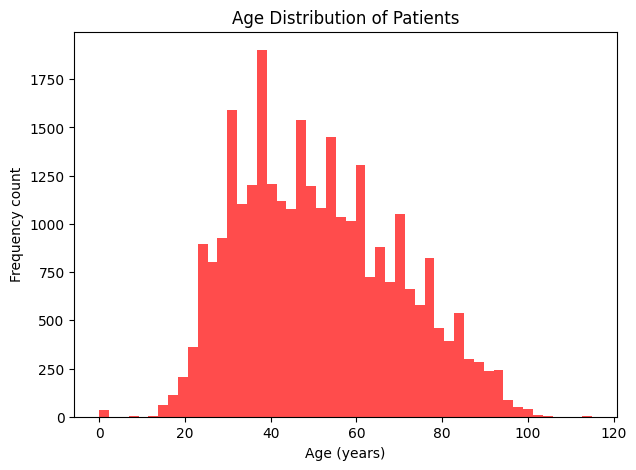

In [ ]:
# Age distribution visual
plt.figure(figsize=(7,5))
plt.hist(covid_df2['age_yrs'],color="red",bins = 50, alpha=0.7)
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency count')
plt.show()

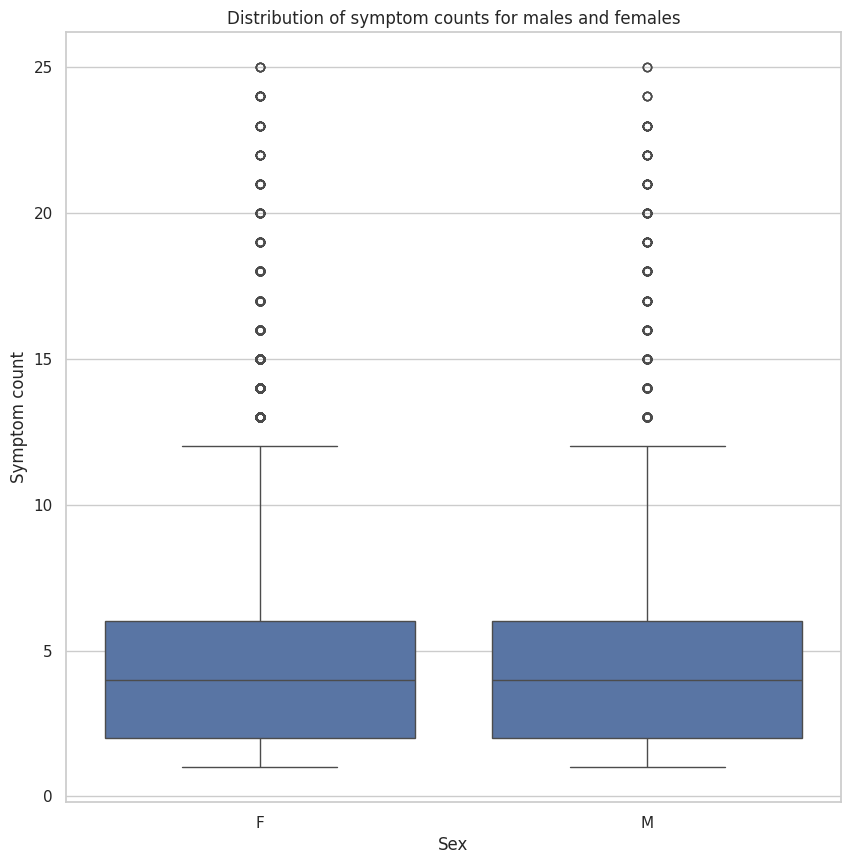

In [ ]:
# Gender vs. Symptom count boxplot
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")
sns.boxplot(x='sex', y='symptom_count', data=covid_df2)
plt.title('Distribution of symptom counts for males and females')
plt.xlabel('Sex')
plt.ylabel('Symptom count')
plt.show()

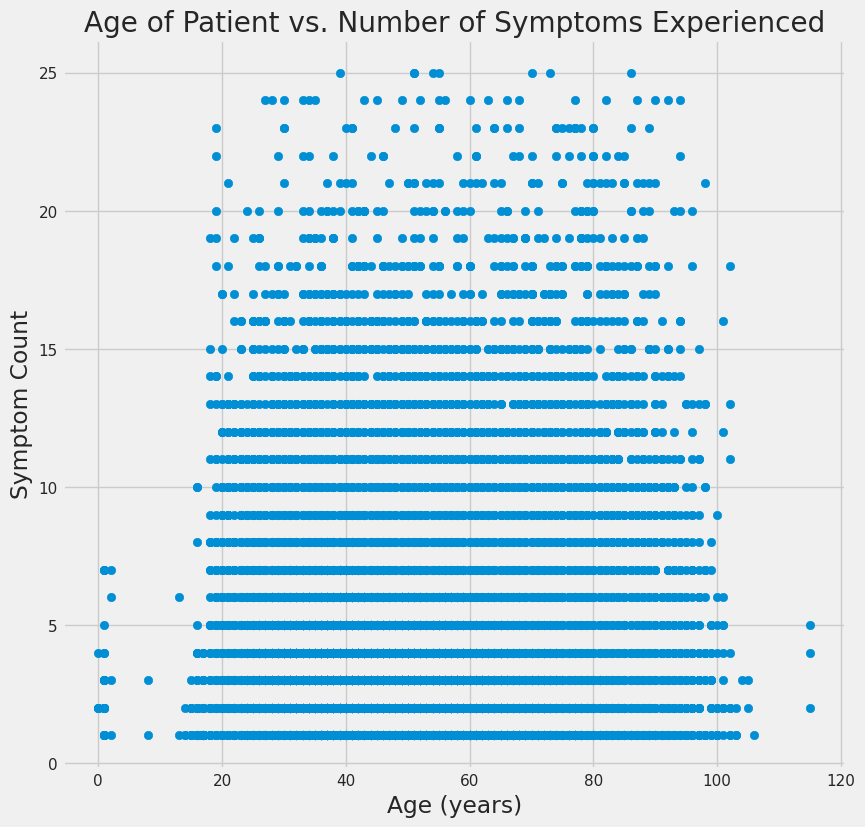

In [ ]:
# Scatter plot visual of age vs. symptom count
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,9))
plt.scatter(x=covid_df2['age_yrs'], y=covid_df2['symptom_count'])
plt.xlabel('Age (years)')
plt.ylabel('Symptom Count')
plt.title('Age of Patient vs. Number of Symptoms Experienced')
plt.show()

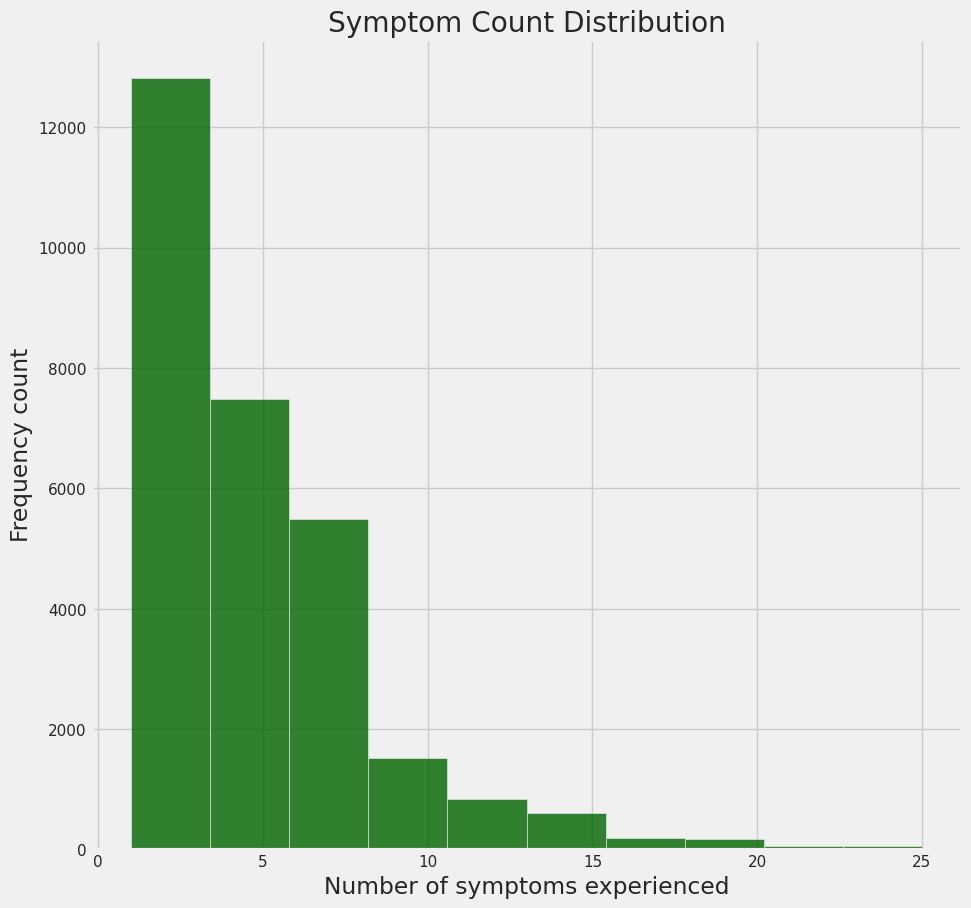

In [ ]:
# Distribution of symptom count in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df2['symptom_count'], color='darkgreen', alpha=0.8)
plt.xlabel('Number of symptoms experienced')
plt.ylabel('Frequency count')
plt.title('Symptom Count Distribution')
plt.show()

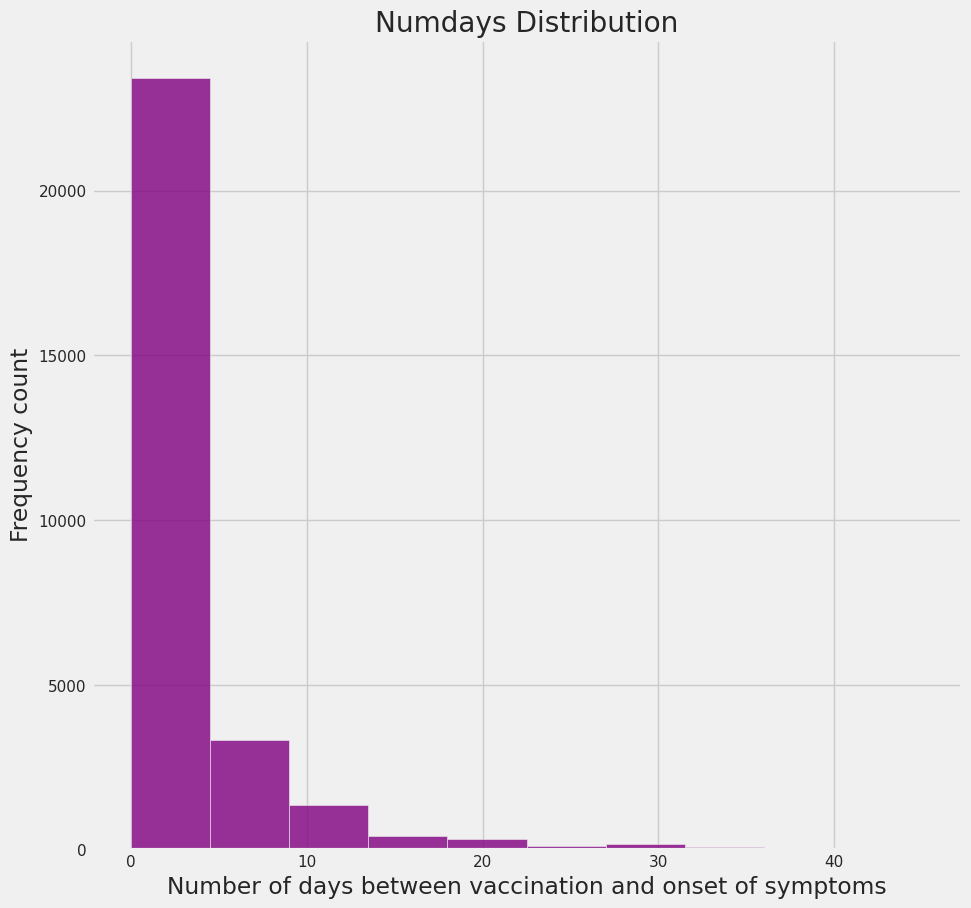

In [ ]:
# Distribution of 'numdays' in our dataset
plt.style.use('fivethirtyeight')
plt.hist(covid_df2['numdays'], color='purple', alpha=0.8)
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Frequency count')
plt.title('Numdays Distribution')
plt.show()

In [ ]:
# Let's take a look at our continuous variables using .describe()
covid_df2[['age_yrs','numdays','symptom_count']].describe()

,age_yrs,numdays,symptom_count
count,29273.000000,29273.000000,29273.000000
mean,51.188536,2.700372,4.732621
std,18.368814,5.093808,3.463876
min,0.000000,0.000000,1.000000
25%,37.000000,0.000000,2.000000
50%,49.000000,1.000000,4.000000
75%,65.000000,3.000000,6.000000
max,115.000000,45.000000,25.000000


Here we see average age of 51 which makes sense since a good portion of the older population got vaccinated when vaccines were first released. Patients in this dataset experienced an average of 4.7 symptoms from the vaccine reaction and an average of 2.7 days between vaccination and onset.

6. Classification Modeling

How well can we classify whether a patient will experience severe side-effects or not based on the factors of age, gender, vaccine manufacturer, and medical history?
Let's identify the feature and target variables for modeling

In [ ]:
# Creating array of Severity column
severity = np.array(covid_df2['severity'])

In [ ]:
# Names of severity variables
severity_Names = ['No Severity','Severe Side-effects']

In [ ]:
# Creating a new column by name of severity_type to identify the type of severity
covid_df2['severity_type'] = np.array([severity_Names[i] for i in severity])

In [ ]:
covid_df2['severity_type'].value_counts()
# 23329 instances of no severity, 5944 cases of severe side-effects

,count
severity_type,
No Severity,23329
Severe Side-effects,5944


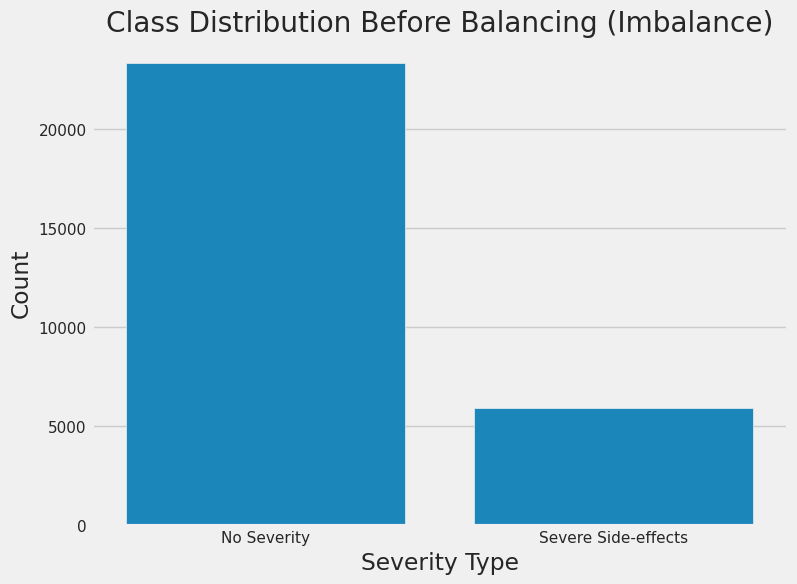

In [ ]:
# Creating a new dataframe using the columns required and the target variable (severity_type)
covid_df_target2 = covid_df2[['age_yrs','sex_num','vax_manu_num','history','severity_type']]

# Visualize class imbalance (before balancing)
plt.figure(figsize=(8, 6))
sns.countplot(x='severity_type', data=covid_df_target2)
plt.title('Class Distribution Before Balancing (Imbalance)')
plt.xlabel('Severity Type')
plt.ylabel('Count')
plt.show()

About a 4:1 class ratio

In [ ]:
# Creating a new dataframe using the columns required and the target variable (severity_type)
# covid_df_target = covid_df2[['age_yrs','sex_num','vax_manu_num','history','severity_type']]

   age_yrs  sex_num  vax_manu_num history severity_type
0     33.0        1             0       0   No Severity
1     73.0        1             0       1   No Severity
2     23.0        1             1       0   No Severity
3     58.0        1             0       1   No Severity
4     47.0        1             0       0   No Severity
The heatmap will have 4 rows and 4 columns.


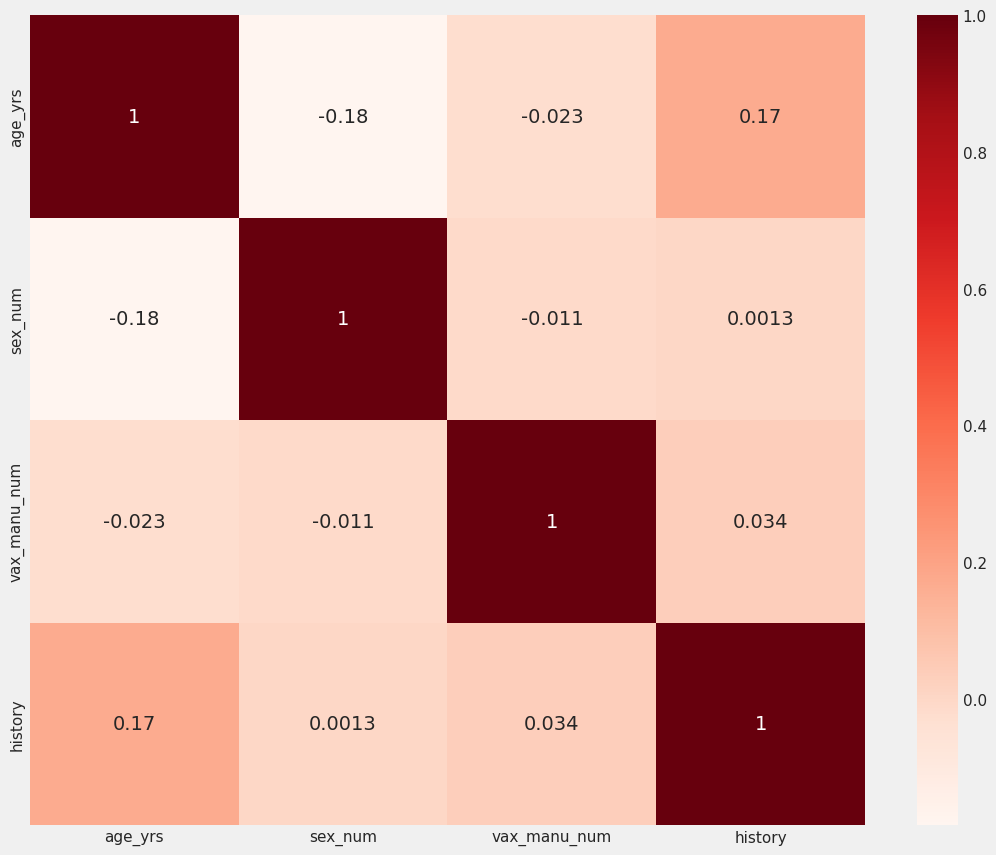

In [ ]:
# Creating a new dataframe with independent variables and 'severity_type'
covid_df_target = covid_df2[['age_yrs', 'sex_num', 'vax_manu_num', 'history']]

# Map the severity_type to "Severity" or "No Severity"
covid_df_target['severity_type'] = covid_df2['severity_type'].map({'No Severity': 'No Severity', 'Severe Side-effects': 'Severity'})

# Calculate correlation matrix only using independent variables
cor = covid_df_target[['age_yrs', 'sex_num', 'vax_manu_num', 'history']].corr()  # Pearson correlation for independent variables

# Print the first few rows of the updated dataframe
print(covid_df_target.head())

# Print the shape of the correlation matrix
print(f"The heatmap will have {cor.shape[0]} rows and {cor.shape[1]} columns.")

# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


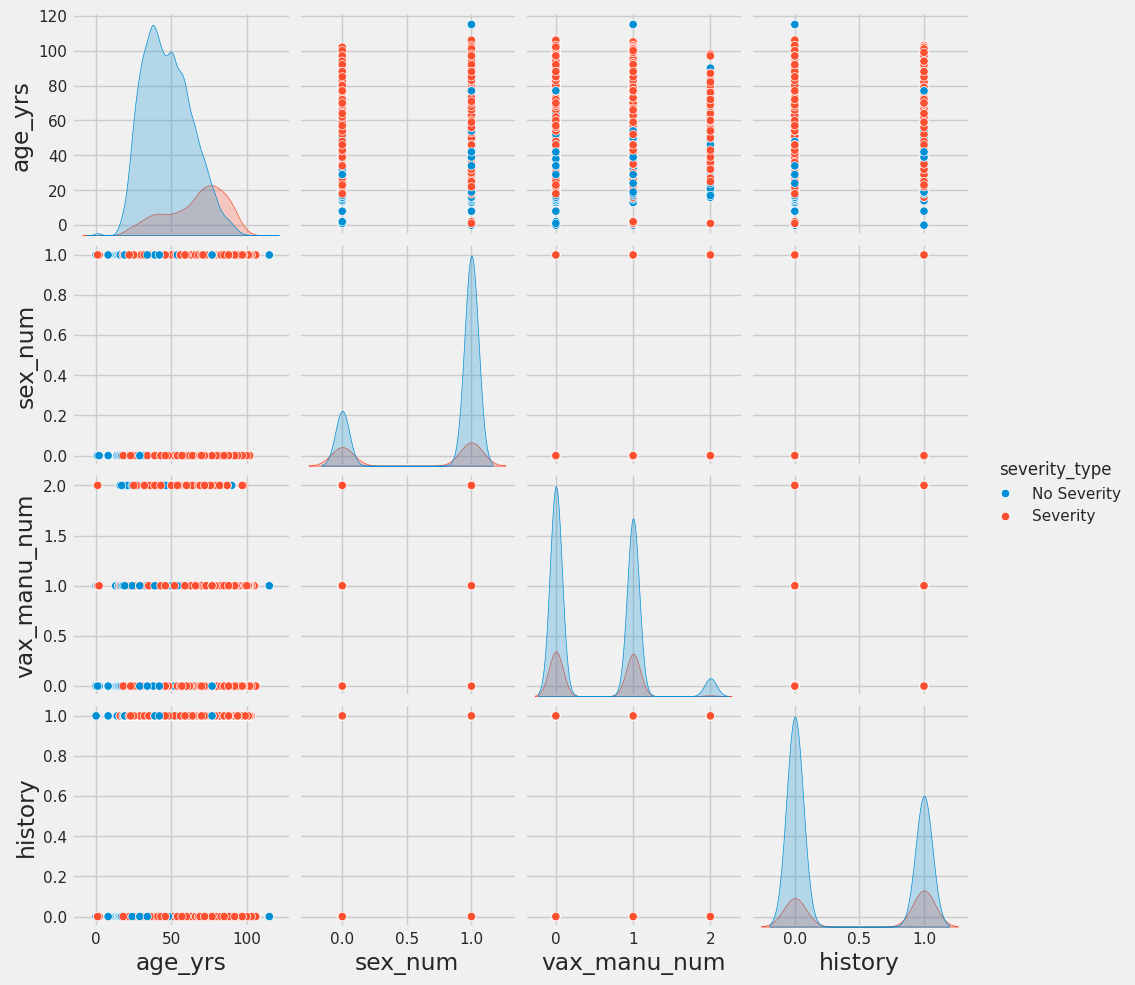

In [ ]:
# Pairplot of the variables
sns.pairplot(covid_df_target, hue='severity_type')
plt.show()

The difference in distributions for age between the two classes is interesting. A T-test could be performed later on to see if that difference is significant.

###TRAINING THE MODEL USING IMBALANCED DATASET

In [ ]:
# Generating the test and train sets using train_test_split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(covid_df_target[['age_yrs','sex_num','vax_manu_num','history']], covid_df_target[['severity_type']] , test_size=0.2, stratify=severity, random_state=123456)


In [ ]:
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_train1_encoded = le.fit_transform(y_train1['severity_type'])

# Similarly, encode y_test1
y_test1_encoded = le.transform(y_test1['severity_type'])

In [ ]:
# Random Forest classification for two classes
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)
rf.fit(X_train1, y_train1_encoded)  # Use y_train1_encoded here

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)

In [ ]:
# Accuracy of Random Forest model
from sklearn.metrics import accuracy_score

predicted1 = rf.predict(X_test1)
accuracy1 = accuracy_score(y_test1_encoded, predicted1) # Use y_test1_encoded here
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy1:.3}')

Out-of-bag score estimate: 0.833
Mean accuracy score: 0.836


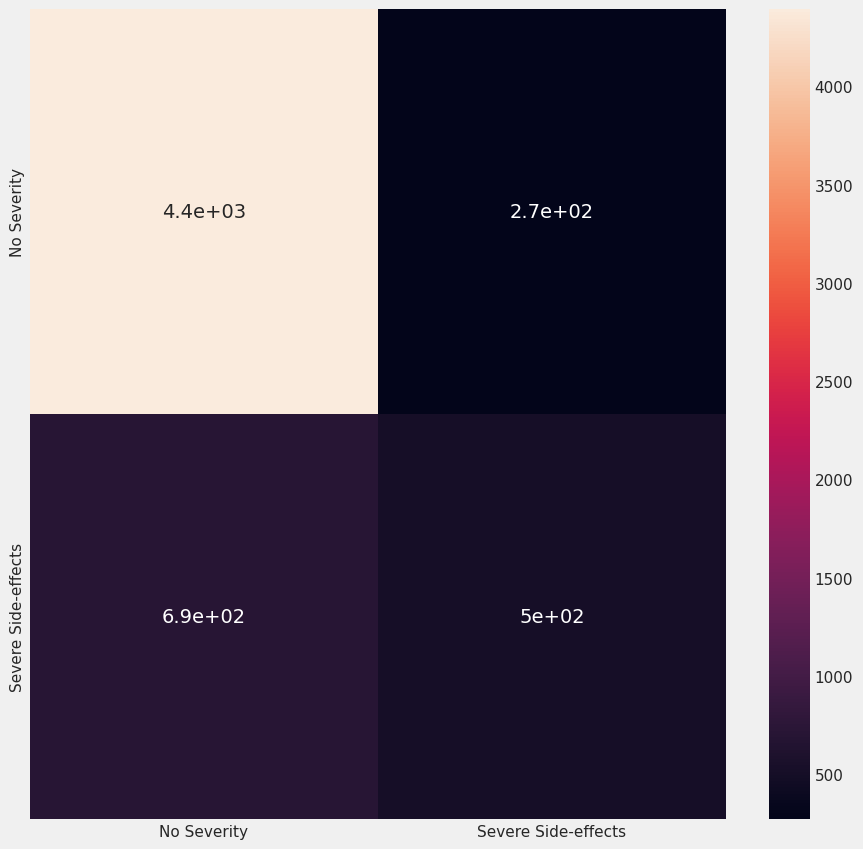

In [ ]:
# Heatmap of Random Forest
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test1_encoded, predicted1), columns=severity_Names, index=severity_Names) # Use y_test1_encoded here
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# Predicting a particular value [age 84, female, pfizer, medical history yes]
rf.predict([[84,1,0,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# Metrics classification report for Random Forest
from sklearn.metrics import classification_report

# Use y_test1_encoded instead of y_test1 to match the predicted labels
print(classification_report(y_test1_encoded, predicted1))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4666
           1       0.65      0.42      0.51      1189

    accuracy                           0.84      5855
   macro avg       0.76      0.68      0.70      5855
weighted avg       0.82      0.84      0.82      5855



While the accuracy score seems to be decent, the classification report tells us a different story. We are able to classify the "No Severity" group well but the model doesn't perform well for the "Severe side-effects" group.

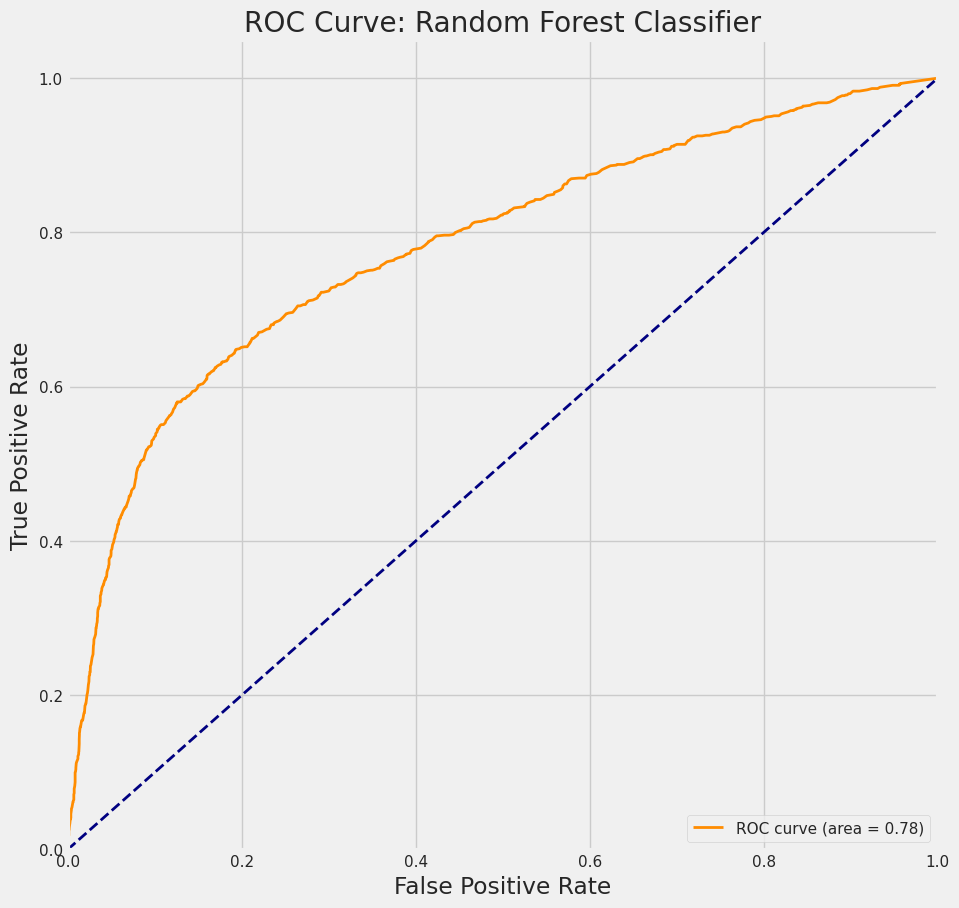

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Random Forest classifier (assuming you already have X_train1, y_train1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train1, y_train1_encoded)  # Use encoded y_train1

# Predict probabilities for the test set
y_pred_proba = rf.predict_proba(X_test1)[:, 1]  # Get the probabilities for the positive class

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1_encoded, y_pred_proba)  # Use encoded y_test1
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


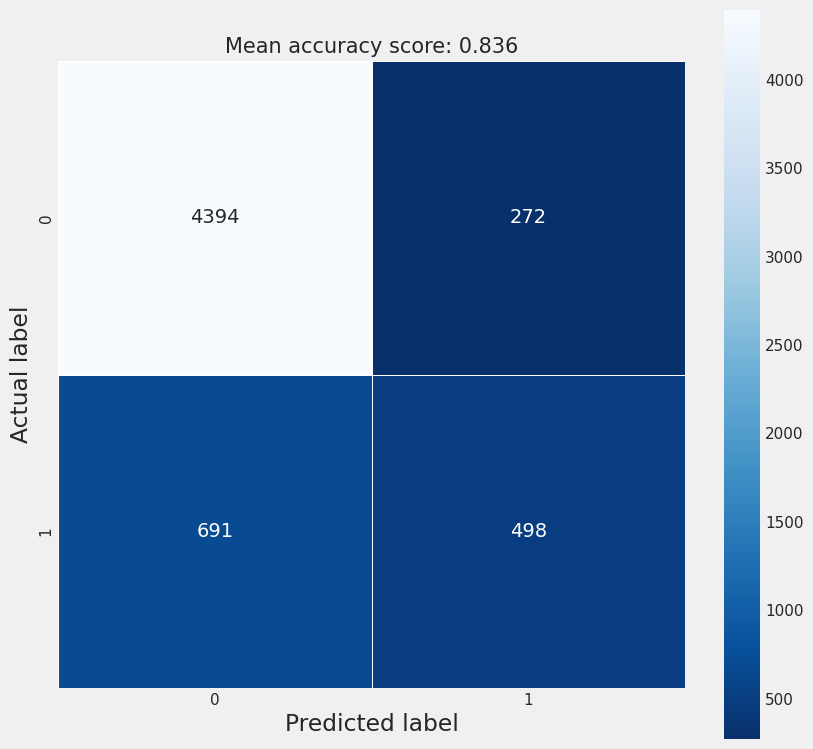

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the predicted labels are stored in 'predicted1'
# Assuming the actual labels are stored in 'y_test1_encoded'

# Confusion matrix
cm = metrics.confusion_matrix(y_test1_encoded, predicted1)

# Plot heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')  # Use fmt="d" for integer format
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Calculate accuracy
accuracy1 = metrics.accuracy_score(y_test1_encoded, predicted1)

# Title with accuracy score
all_sample_title = f'Mean accuracy score: {accuracy1:.3f}'
plt.title(all_sample_title, size=15)
plt.show()


###Again we see the downfalls of this RF model. Less than half of the "Severe side-effects" group in the test set is being predicted accurately.

In [ ]:
# Using Logistic Regression for the same 2-class classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1_encoded)  # Using the encoded y_train1

LogisticRegression()

In [ ]:
# Make predictions and calculate probabilities
predictions1 = logreg.predict(X_test1)
predicted_probas1 = logreg.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Calculate the accuracy score
accuracy1_logreg = logreg.score(X_test1, y_test1_encoded)
print(f"Accuracy score: {accuracy1_logreg:.3f}")


Accuracy score: 0.838


In [ ]:
# Classification report for Logistic Regression
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test1_encoded, predictions1))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4666
           1       0.70      0.36      0.47      1189

    accuracy                           0.84      5855
   macro avg       0.78      0.66      0.69      5855
weighted avg       0.82      0.84      0.82      5855



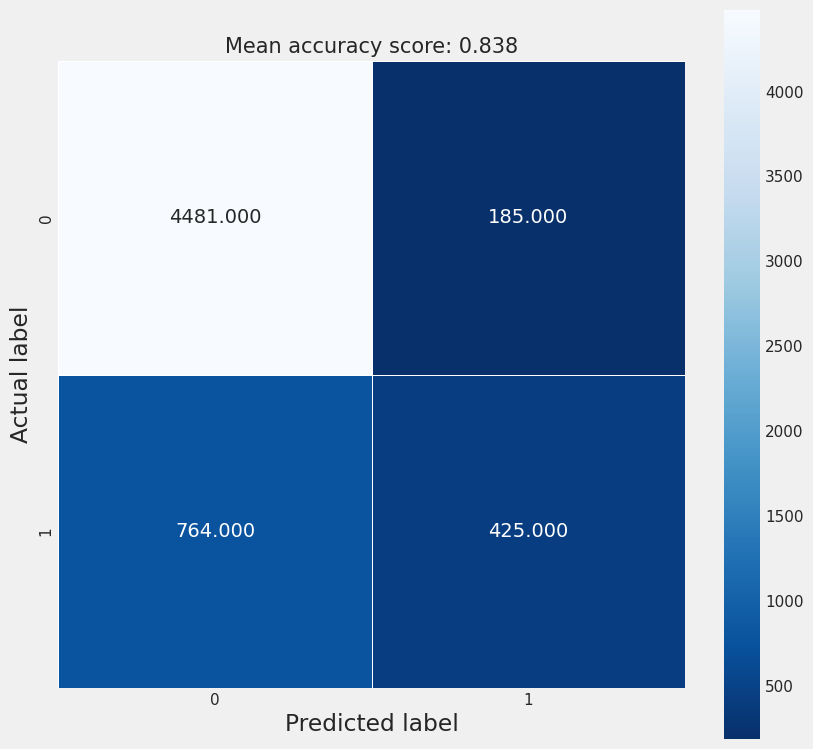

In [ ]:
# Compute confusion matrix
cm = metrics.confusion_matrix(y_test1_encoded, predictions1)

# Plot confusion matrix as heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Mean accuracy score: {accuracy1_logreg:.3f}' # Changed 'score' to 'accuracy1_logreg'
plt.title(all_sample_title, size = 15)
plt.show()

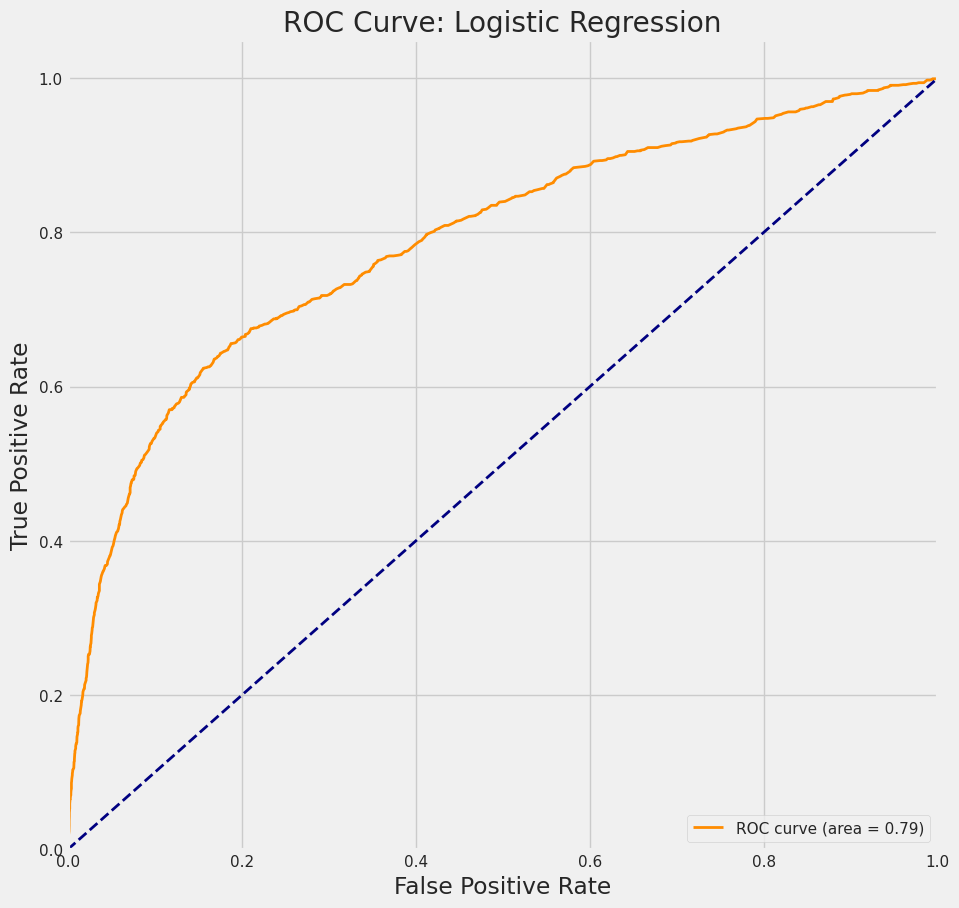

In [ ]:
# Plot ROC Curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test1_encoded, predicted_probas1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc="lower right")
plt.show()


### We see the logistic regression is experiencing the same struggles. "No severity" getting classified correctly while "Severe side-effects" gets misclassified. Ultimately, we'd like to be more cautious in our predictions since having severe side effects is much more costly to an individual than not.

In [ ]:
# Using Gradient Boosting Classifier to predict two classes
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)

# Train the model with training data
clf.fit(X_train1, y_train1_encoded)  # Ensure you're using the encoded y_train1

# Predict on the test data
predictions_gb = clf.predict(X_test1)



In [ ]:
# Make predictions and calculate probabilities for Gradient Boosting Classifier
predictions_gb = clf.predict(X_test1)
predicted_probas_gb = clf.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Calculate the accuracy score for Gradient Boosting
accuracy1_gb = clf.score(X_test1, y_test1_encoded)
print(f"Accuracy score: { accuracy1_gb:.3f}")


Accuracy score: 0.839


In [ ]:
# Classification report for gradient boosting classifier
print(classification_report(y_test1_encoded, predictions1))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4666
           1       0.70      0.36      0.47      1189

    accuracy                           0.84      5855
   macro avg       0.78      0.66      0.69      5855
weighted avg       0.82      0.84      0.82      5855



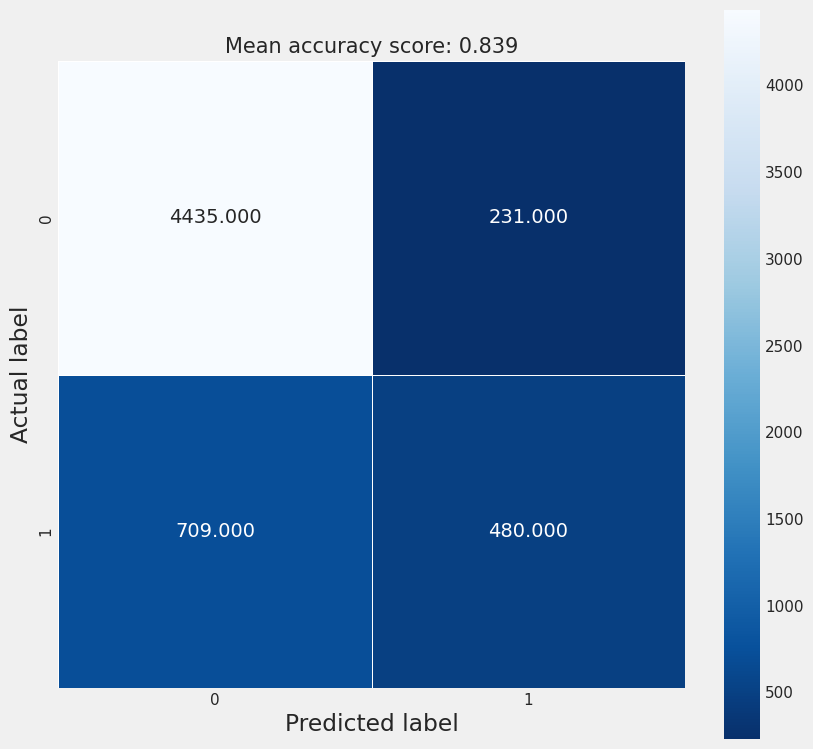

In [ ]:
# Compute confusion matrix for Gradient Boosting
cm_gb = metrics.confusion_matrix(y_test1_encoded, predictions_gb)

# Plot confusion matrix as heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm_gb, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Mean accuracy score: {accuracy1_gb:.3f}' # Replace score_gb with accuracy1_gb
plt.title(all_sample_title, size = 15)
plt.show()

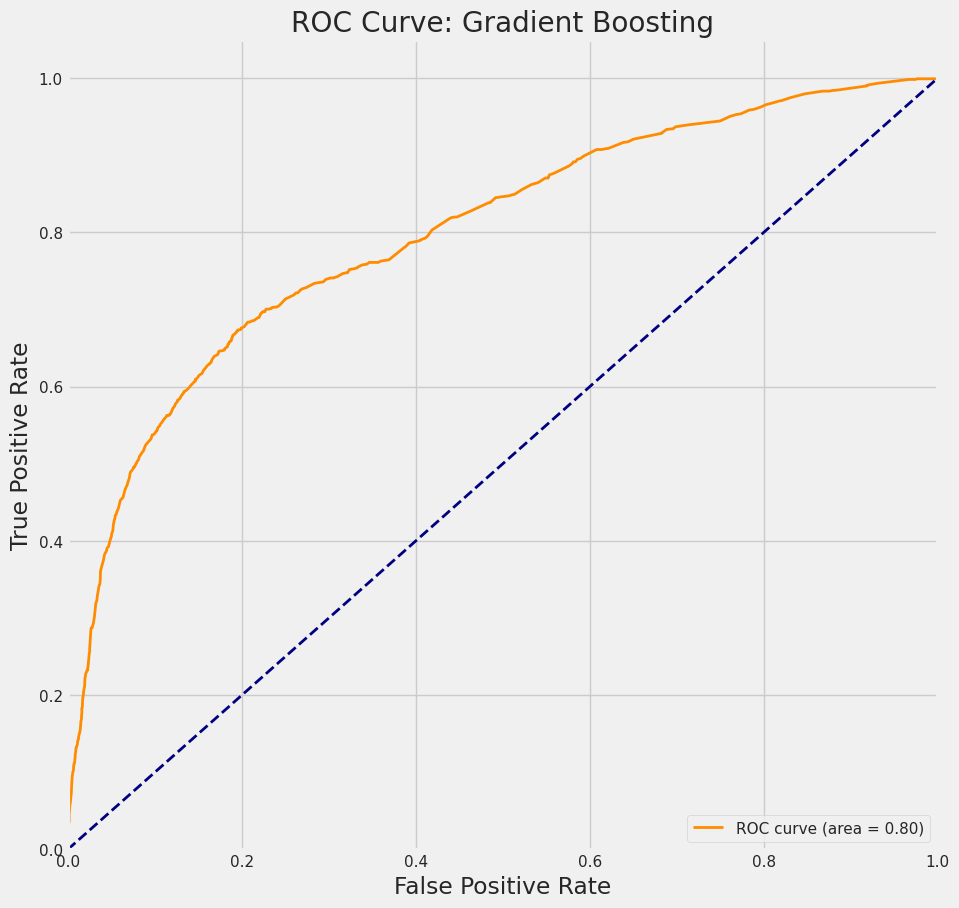

In [ ]:
# Plot ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test1_encoded, predicted_probas_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 10))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Predict the case with the given features: [age=90, female=1, moderna=1, medical_history=1]
prediction = clf.predict([[90, 1, 1, 1]])

# Output the predicted class
print(f"Predicted class: {prediction[0]}")


Predicted class: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


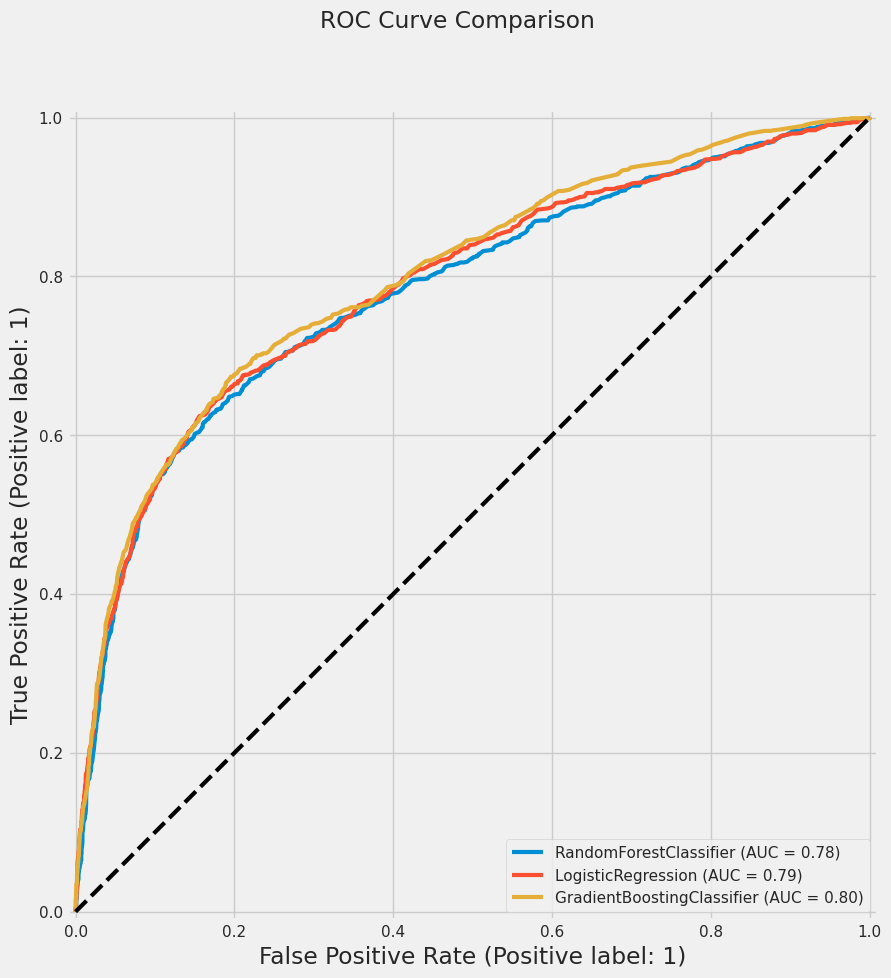

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Create the first ROC curve for Random Forest
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure and axes
RocCurveDisplay.from_estimator(rf, X_test1, y_test1_encoded, lw=3, ax=ax)

# Add ROC curve for Logistic Regression
RocCurveDisplay.from_estimator(logreg, X_test1, y_test1_encoded, ax=ax, lw=3)

# Add ROC curve for Gradient Boosting
RocCurveDisplay.from_estimator(clf, X_test1, y_test1_encoded, ax=ax, lw=3)

# Set the title for the entire plot
fig.suptitle("ROC Curve Comparison")

# Add the diagonal line representing the random classifier
plt.plot([0, 1], [0, 1], '--', color='black', lw=3)

# Show the plot
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train1 and y_train1_encoded are already defined

# Convert 'history' column to numeric type (e.g., int or float)
X_train1['history'] = pd.to_numeric(X_train1['history'], errors='coerce').astype(int)

# Fill any NaN values in 'history' if needed
X_train1['history'] = X_train1['history'].fillna(X_train1['history'].mean())

# Initialize and train the XGBoost model (without use_label_encoder)
xgb_model = XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')

# Train the model (Ensure y_train1_encoded is correctly encoded if categorical)
xgb_model.fit(X_train1, y_train1_encoded)

# Make predictions
y_pred = xgb_model.predict(X_train1)

# Evaluate the model
print("Accuracy:", accuracy_score(y_train1_encoded, y_pred))
print("Classification Report:\n", classification_report(y_train1_encoded, y_pred))


Accuracy: 0.8425997096250747
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     18663
           1       0.68      0.43      0.53      4755

    accuracy                           0.84     23418
   macro avg       0.77      0.69      0.72     23418
weighted avg       0.83      0.84      0.83     23418



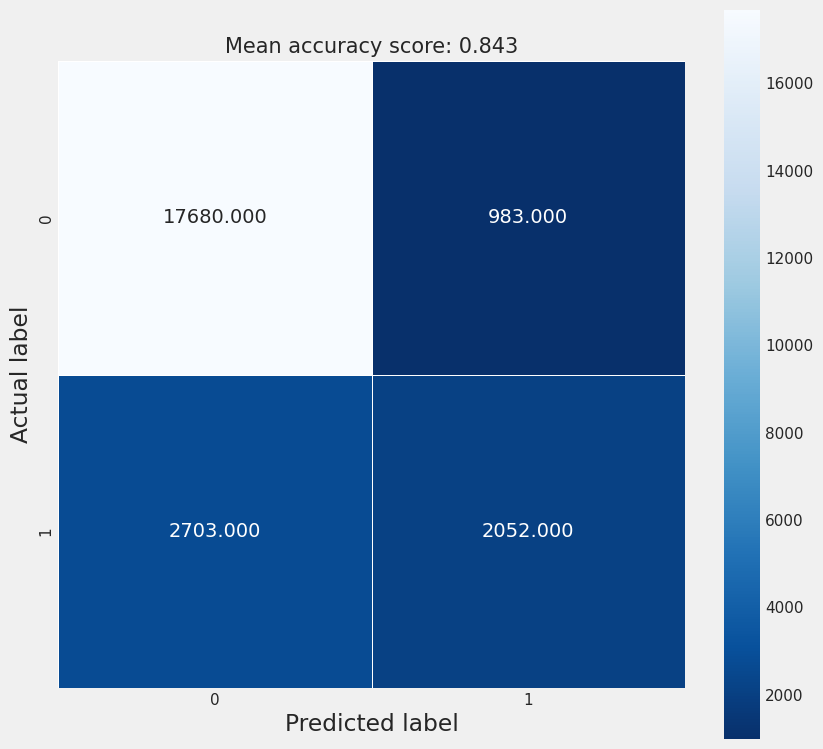

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_train1_encoded, y_pred)

# If the confusion matrix is larger, slice it for visualization (example: first 4000 classes)
cm_limited = cm[:4000, :4000]  # Adjust slice size based on your comparison range

# Plot the limited confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_limited, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
accuracy1_xgb = accuracy_score(y_train1_encoded, y_pred)
plt.title(f'Mean accuracy score: {accuracy1_xgb:.3f}', size=15)
plt.show()


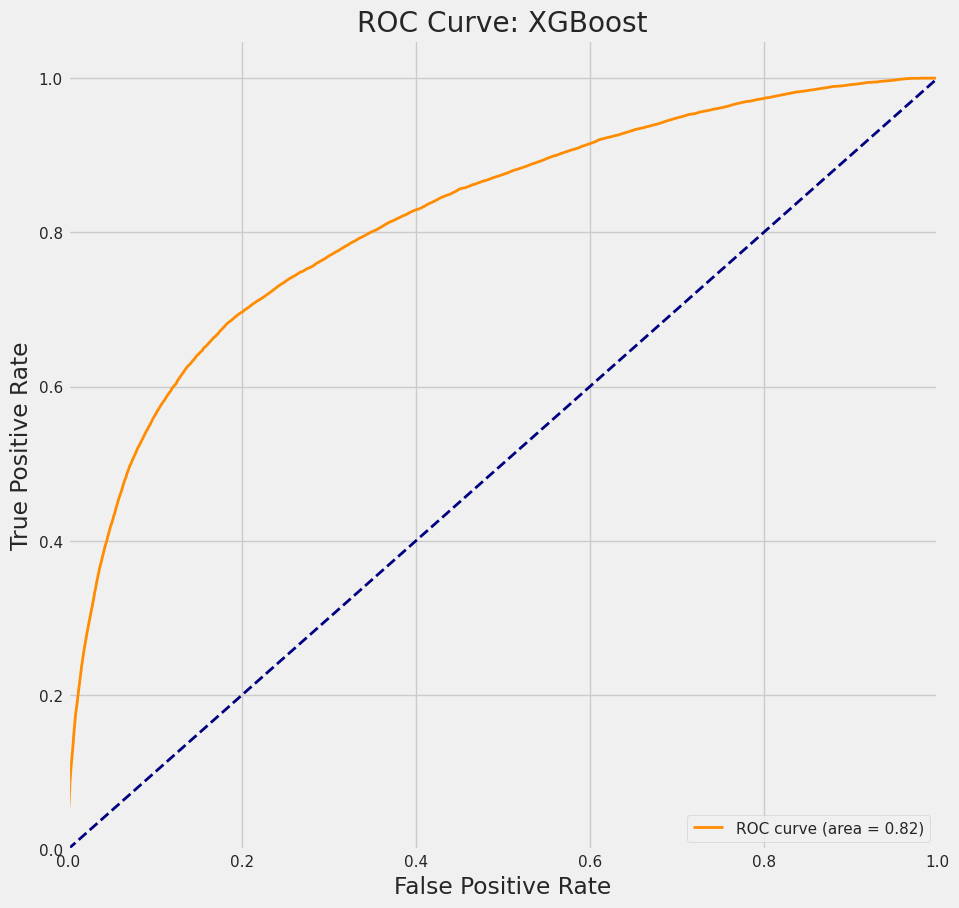

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each class (instead of class predictions)
y_pred_probas = xgb_model.predict_proba(X_train1)  # Returns probability for each class

# Calculate the ROC curve (for multi-class, we can loop through each class)
# Assuming a binary classification for simplicity here. Adjust for multi-class if needed.
fpr, tpr, thresholds = roc_curve(y_train1_encoded, y_pred_probas[:, 1])  # For class 1 in binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost')
plt.legend(loc="lower right")
plt.show()


###Adaboost


In [ ]:
# Using AdaBoost Classifier to predict two classes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=300, random_state=0)

# Train the model with training data
adaboost_model.fit(X_train1, y_train1_encoded)  # Ensure you're using the encoded y_train1
# Predict on the training data
predictions_ada = adaboost_model.predict(X_train1)


In [ ]:
# Make predictions and calculate probabilities for AdaBoost Classifier
predictions_ada = adaboost_model.predict(X_test1)
predicted_probas_ada = adaboost_model.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Calculate the accuracy score for AdaBoost
score_ada = adaboost_model.score(X_test1, y_test1_encoded)
print(f"AdaBoost Accuracy score: {score_ada:.3f}")


AdaBoost Accuracy score: 0.841


In [ ]:
# Classification report for AdaBoost classifier
print(classification_report(y_test1_encoded, predictions_ada))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4666
           1       0.68      0.40      0.51      1189

    accuracy                           0.84      5855
   macro avg       0.77      0.68      0.71      5855
weighted avg       0.83      0.84      0.82      5855



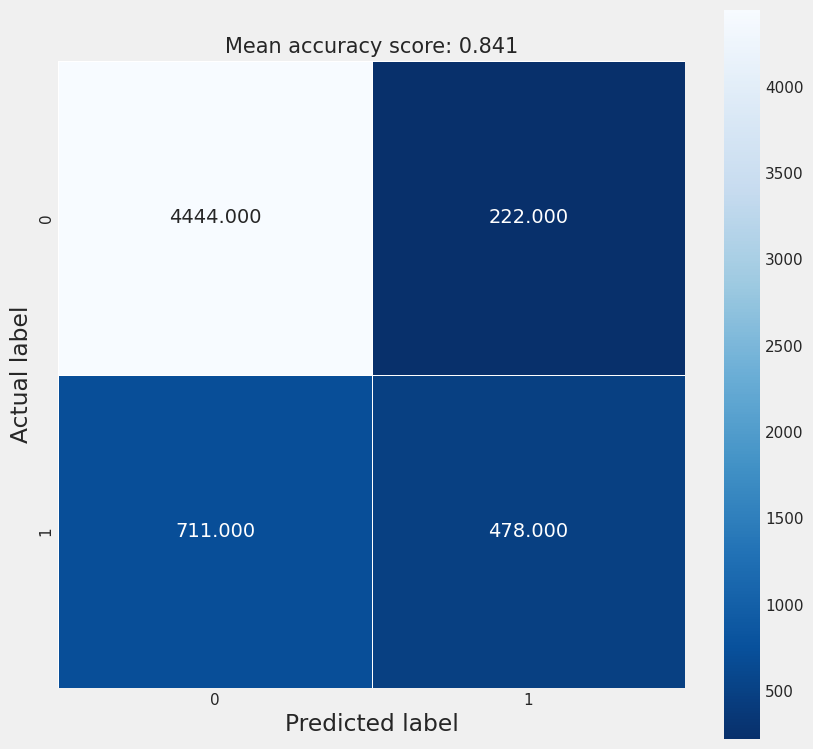

In [ ]:
# Compute confusion matrix for AdaBoost
cm_ada = confusion_matrix(y_test1_encoded, predictions_ada)

# Plot confusion matrix as heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm_ada, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Mean accuracy score: {score_ada:.3f}'
plt.title(all_sample_title, size=15)
plt.show()


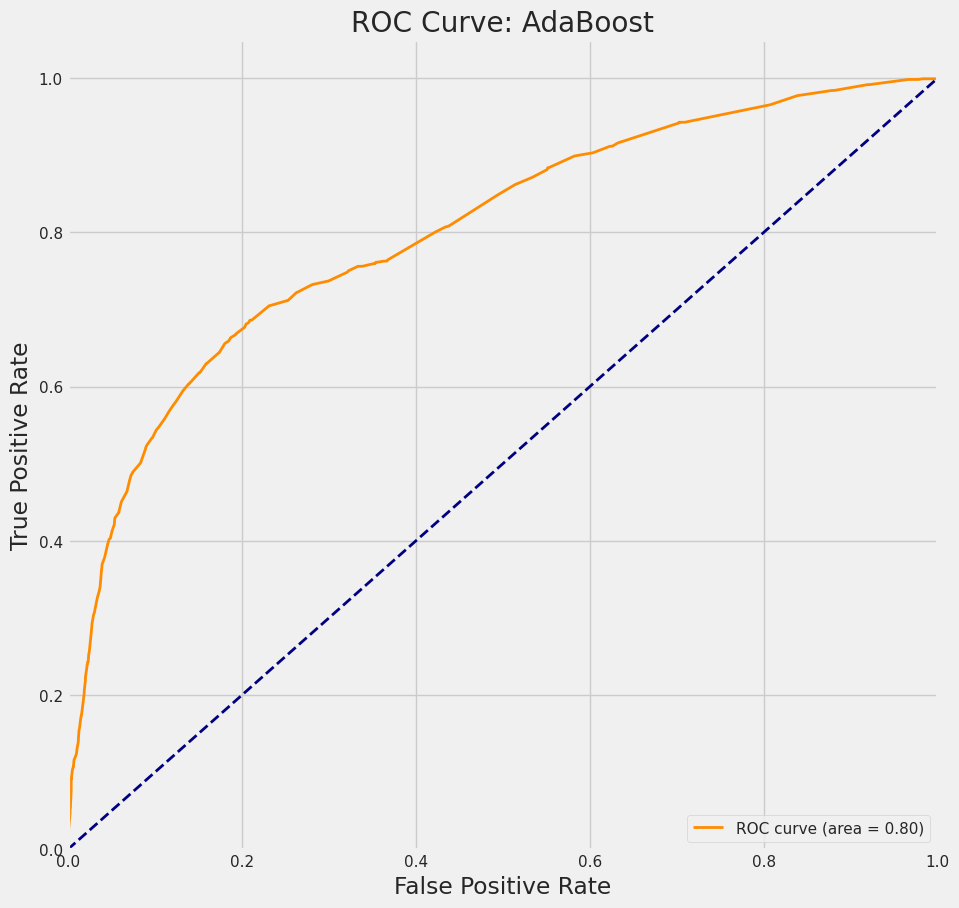

In [ ]:
# Plot ROC Curve for AdaBoost
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test1_encoded, predicted_probas_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

plt.figure(figsize=(10, 10))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: AdaBoost')
plt.legend(loc="lower right")
plt.show()


###LGBM


In [ ]:
# Import necessary libraries for LGBM
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize LGBM model
lgbm_model = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=0)

# Train the model with training data
lgbm_model.fit(X_train1, y_train1_encoded)  # Ensure you're using the encoded y_train1

# Before calling predict, convert 'history' to numeric
X_test1['history'] = X_test1['history'].astype(int)  # Assuming 'history' should be an integer

# Predict on the test data
predictions_lgbm = lgbm_model.predict(X_test1)

[LightGBM] [Info] Number of positive: 4755, number of negative: 18663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 101
[LightGBM] [Info] Number of data points in the train set: 23418, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203049 -> initscore=-1.367346
[LightGBM] [Info] Start training from score -1.367346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
# Make predictions and calculate probabilities
lgbm_predictions = lgbm_model.predict(X_test1)
lgbm_predicted_probas = lgbm_model.predict_proba(X_test1)[:, 1]  # Get probabilities for the positive class

# Calculate the accuracy score
accuracy1_lgbm = lgbm_model.score(X_test1, y_test1_encoded)
print(f"LGBM Accuracy score: {accuracy1_lgbm:.3f}")

LGBM Accuracy score: 0.839


In [ ]:
# Classification Report for LGBM
print("LGBM Classification Report")
print(classification_report(y_test1_encoded, lgbm_predictions))

LGBM Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4666
           1       0.66      0.43      0.52      1189

    accuracy                           0.84      5855
   macro avg       0.76      0.69      0.71      5855
weighted avg       0.82      0.84      0.83      5855



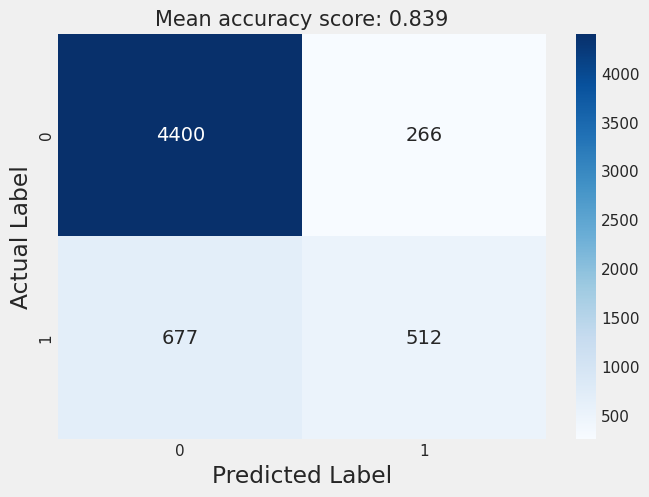

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for LGBM model
cm = confusion_matrix(y_test1_encoded, lgbm_predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for LGBM Model")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
all_sample_title = f'Mean accuracy score: {accuracy1_lgbm:.3f}'
plt.title(all_sample_title, size = 15)
plt.show()


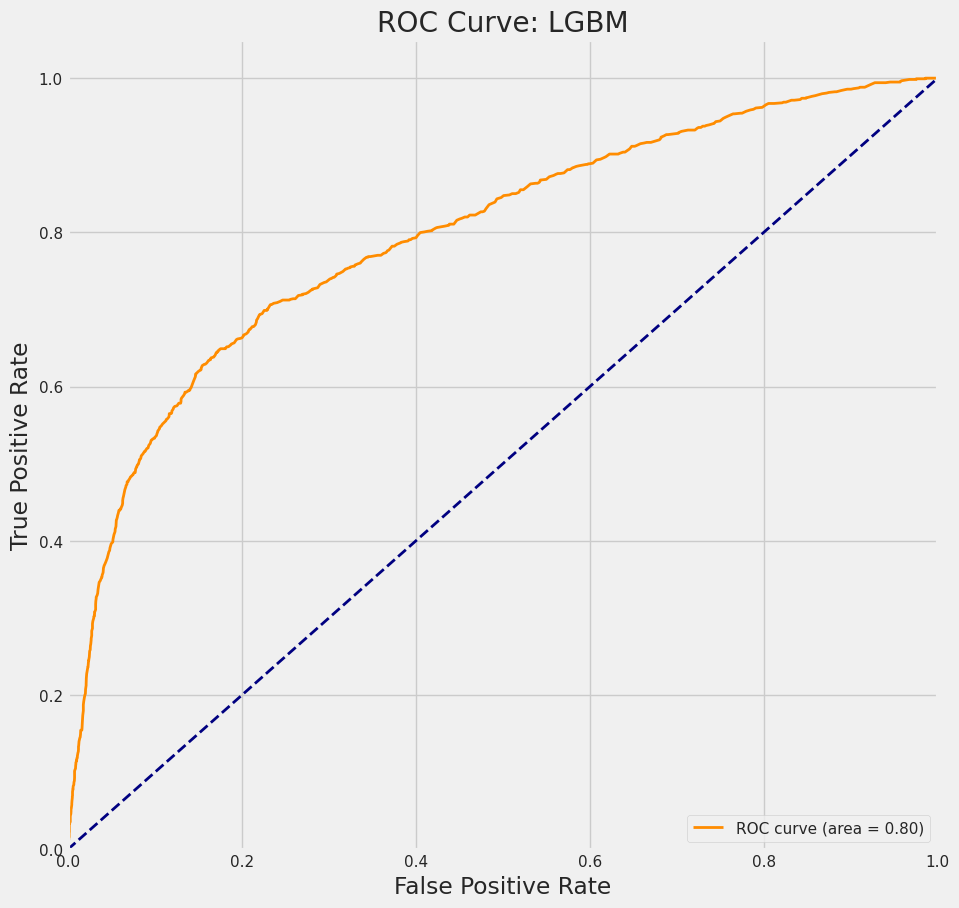

In [ ]:
# Compute ROC curve and AUC for LGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test1_encoded, lgbm_predicted_probas)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Plot ROC Curve for LGBM
plt.figure(figsize=(10, 10))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LGBM')
plt.legend(loc="lower right")
plt.show()

## Now to avoid the errors due to the high count of 'No Severity' data, we will equalize both the target and input variables and remodel the data using random forest, logistic, and gradient boosting classifiers

###BALANCING THE NO SEVERITY AND SEVERITY CASES


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Selecting the required columns
covid_df_target2 = covid_df2[['age_yrs', 'sex_num', 'vax_manu_num', 'history', 'severity_type']]

# Separate features (X) and target (y)
X = covid_df_target2[['age_yrs', 'sex_num', 'vax_manu_num', 'history']]
y = covid_df_target2['severity_type']


In [ ]:
# Apply SMOTE before splitting into train and test sets
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_resampled.value_counts())


Class distribution after SMOTE:
 severity_type
No Severity            23329
Severe Side-effects    23329
Name: count, dtype: int64


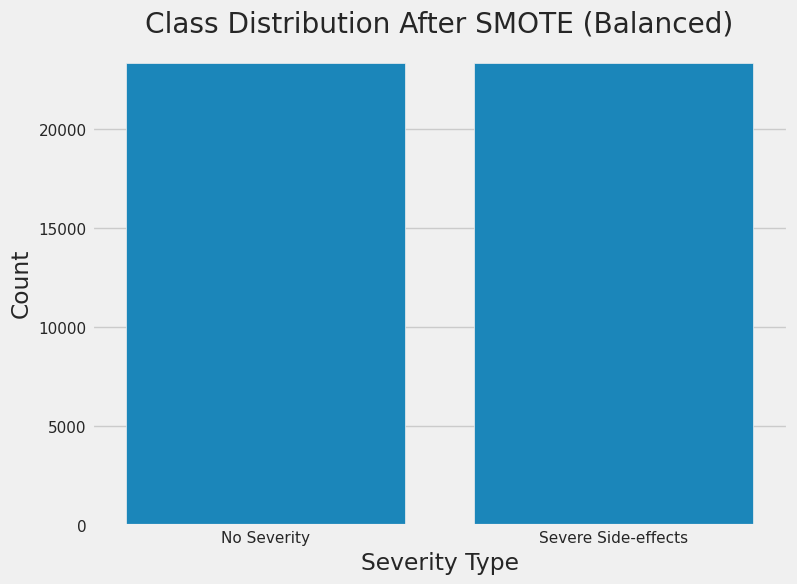

In [ ]:
# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE (Balanced)')
plt.xlabel('Severity Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# Split the resampled dataset into training and testing sets (80-20 split)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=123456
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)

# Train the model with the training data
rf.fit(X_train2, y_train2)


RandomForestClassifier(n_estimators=300, oob_score=True, random_state=123456)

In [ ]:
# Predict the test data
y_pred2 = rf.predict(X_test2)

# Calculate accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f' Mean Accuracy score: {accuracy2:.3f}')
# Display the out-of-bag score
print(f'Out-of-Bag score estimate: {rf.oob_score_:.3f}')



 Mean Accuracy score: 0.749
Out-of-Bag score estimate: 0.746


In [ ]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test2, y_pred2))


Classification Report:
                      precision    recall  f1-score   support

        No Severity       0.72      0.82      0.76      4666
Severe Side-effects       0.79      0.68      0.73      4666

           accuracy                           0.75      9332
          macro avg       0.75      0.75      0.75      9332
       weighted avg       0.75      0.75      0.75      9332



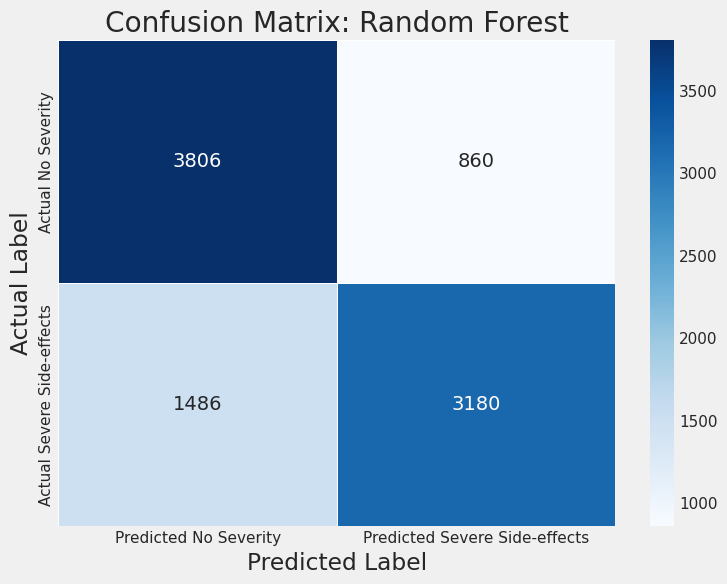

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted No Severity', 'Predicted Severe Side-effects'],
                     index=['Actual No Severity', 'Actual Severe Side-effects'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


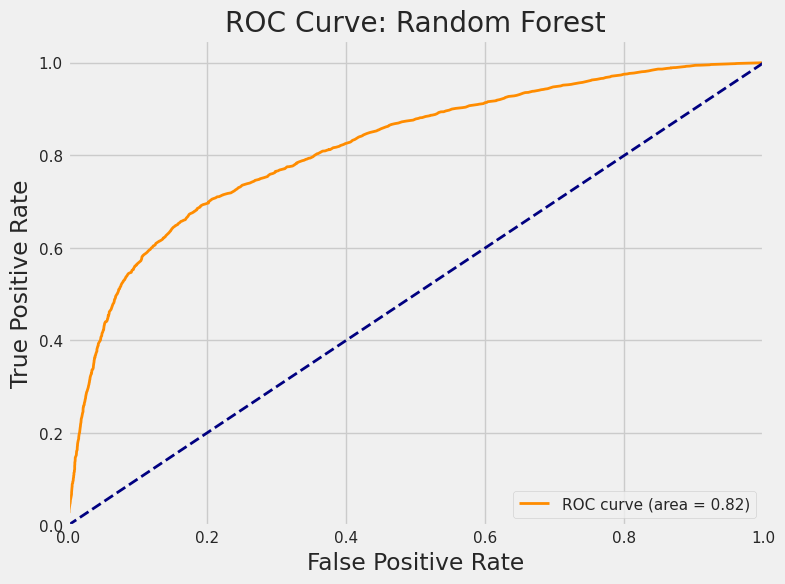

In [ ]:
# Get predicted probabilities
y_pred_proba = rf.predict_proba(X_test2)[:, 1]

# Assuming 'Severe Side-effects' is the positive class
# Convert y_test2 to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test2_numeric = le.fit_transform(y_test2)

# Compute ROC curve with the numeric y_test2
fpr, tpr, thresholds = roc_curve(y_test2_numeric, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=123456)

# Train the model with the training data
logreg.fit(X_train2, y_train2)


LogisticRegression(max_iter=1000, random_state=123456)

In [ ]:
# Predict the test data
y_pred2_logreg = logreg.predict(X_test2)

# Calculate accuracy
accuracy2_logreg = accuracy_score(y_test2, y_pred2_logreg)
print(f'Accuracy: {accuracy2_logreg:.3f}')


Accuracy: 0.721


In [ ]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test2, y_pred2_logreg))


Classification Report:
                      precision    recall  f1-score   support

        No Severity       0.71      0.74      0.73      4666
Severe Side-effects       0.73      0.70      0.72      4666

           accuracy                           0.72      9332
          macro avg       0.72      0.72      0.72      9332
       weighted avg       0.72      0.72      0.72      9332



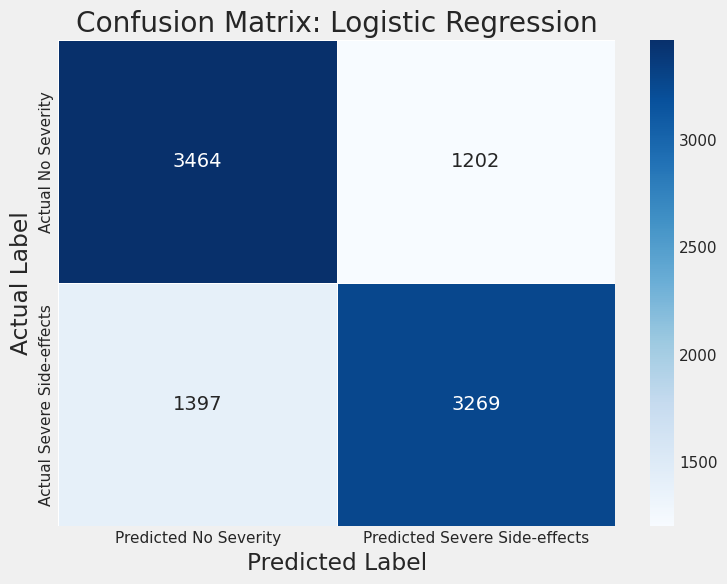

In [ ]:
# Generate the confusion matrix
cm_logreg = confusion_matrix(y_test2, y_pred2_logreg)

# Create a DataFrame for the confusion matrix
cm_df_logreg = pd.DataFrame(cm_logreg, columns=['Predicted No Severity', 'Predicted Severe Side-effects'],
                            index=['Actual No Severity', 'Actual Severe Side-effects'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_logreg, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


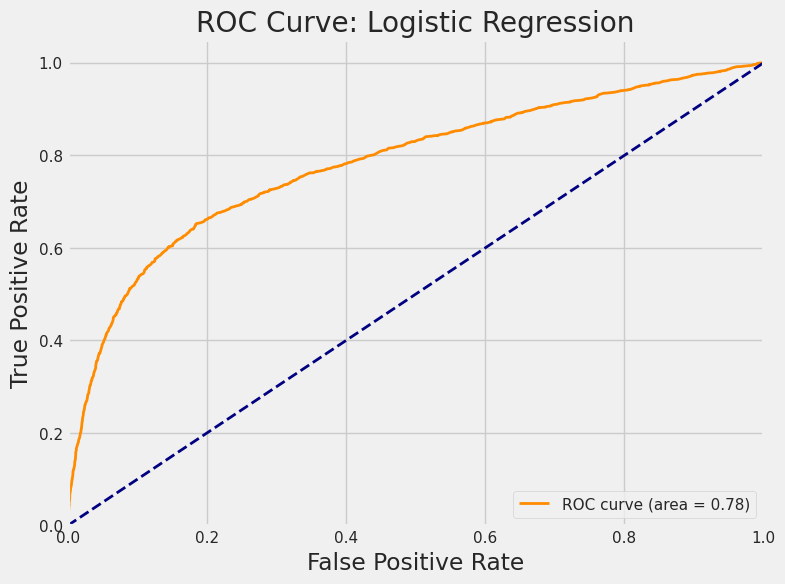

In [ ]:
# Get predicted probabilities
y_pred_proba_logreg = logreg.predict_proba(X_test2)[:, 1]

# Convert y_test2 to numeric using LabelEncoder if it contains strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test2_numeric = le.fit_transform(y_test2)  # Convert string labels to numeric

# Compute ROC curve using the numeric labels
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test2_numeric, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot the ROC curve (rest of the code remains the same)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=123456)
# Train the model with the training data
gb.fit(X_train2, y_train2)


GradientBoostingClassifier(random_state=123456)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the test data (using X_test2 and y_test2 consistently)
y_pred2_gb = gb.predict(X_test2)

# Calculate the accuracy score using the same test set (X_test2 and y_test2)
accuracy_gb = accuracy_score(y_test2, y_pred2_gb)
print(f"Accuracy score: {accuracy_gb:.3f}")

# Display the classification report
print("Classification Report:\n", classification_report(y_test2, y_pred2_gb))


Accuracy score: 0.746
Classification Report:
                      precision    recall  f1-score   support

        No Severity       0.72      0.81      0.76      4666
Severe Side-effects       0.78      0.68      0.73      4666

           accuracy                           0.75      9332
          macro avg       0.75      0.75      0.74      9332
       weighted avg       0.75      0.75      0.74      9332



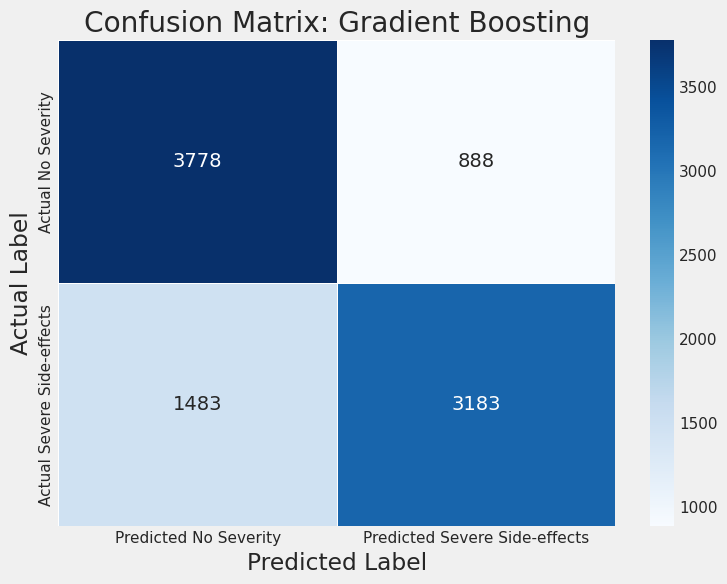

In [ ]:
# Generate the confusion matrix
cm_gb = confusion_matrix(y_test2, y_pred2_gb)

# Create a DataFrame for the confusion matrix
cm_df_gb = pd.DataFrame(cm_gb, columns=['Predicted No Severity', 'Predicted Severe Side-effects'],
                         index=['Actual No Severity', 'Actual Severe Side-effects'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_gb, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix: Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

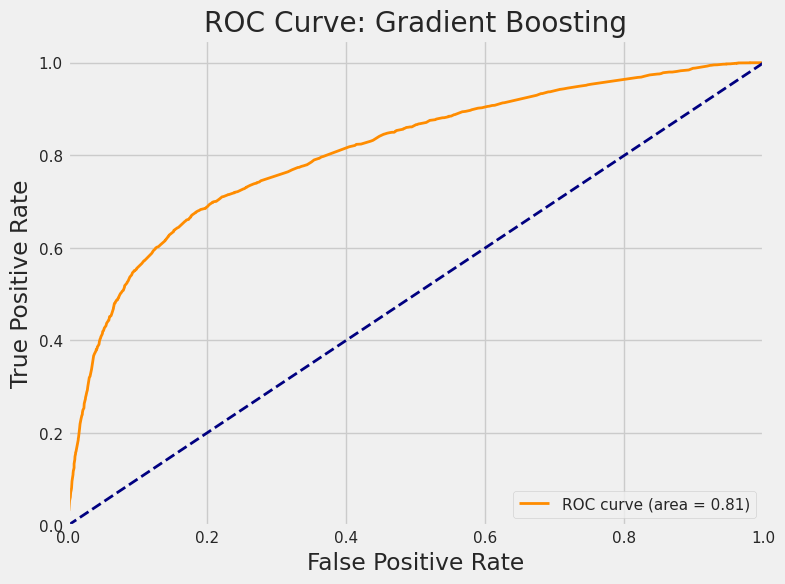

In [ ]:
# Get predicted probabilities
y_pred_proba_gb = gb.predict_proba(X_test2)[:, 1]

# Convert y_test2 to numeric using LabelEncoder if it contains strings
le = LabelEncoder()
y_test2_numeric_gb = le.fit_transform(y_test2)  # Convert string labels to numeric

# Compute ROC curve using the numeric labels
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test2_numeric_gb, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Convert 'history' column to numeric type (e.g., int or float) before fitting the model
X_train2['history'] = X_train2['history'].astype(int)  # Or X_train2['history'].astype(float) if needed
X_test2['history'] = X_test2['history'].astype(int)

# Assuming you're using LabelEncoder for encoding target variable
le = LabelEncoder()
y_train2_encoded = le.fit_transform(y_train2)
y_test2_encoded = le.transform(y_test2)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0, eval_metric='logloss')
xgb_model.fit(X_train2, y_train2_encoded)  # Now fit with the modified X_train2

# Make predictions for the test set and store them in y_pred2_xgb
y_pred2_xgb = xgb_model.predict(X_test2)  # Predict using the modified X_test2

In [ ]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test2_encoded, y_pred2_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.76      4666
           1       0.78      0.68      0.72      4666

    accuracy                           0.74      9332
   macro avg       0.74      0.74      0.74      9332
weighted avg       0.74      0.74      0.74      9332



In [ ]:
# Calculate accuracy
accuracy2_xgb = accuracy_score(y_test2_encoded,  y_pred2_xgb)
print(f'Accuracy: {accuracy2_xgb:.3f}')

Accuracy: 0.740


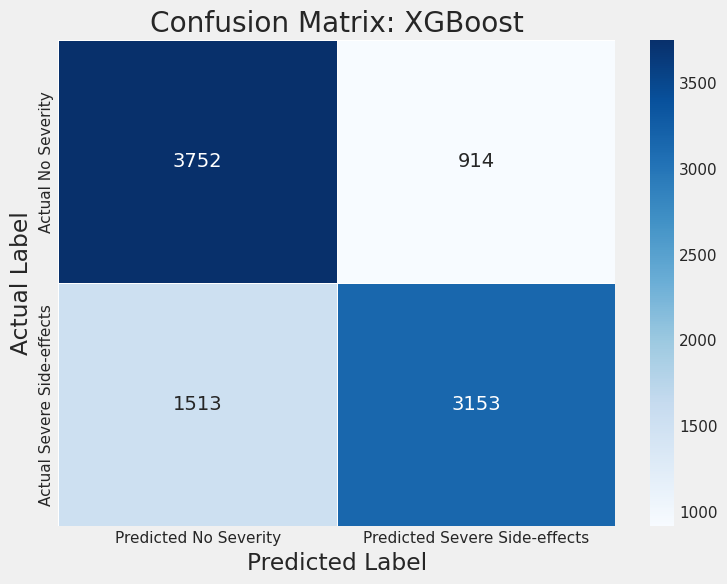

In [ ]:
# Generate the confusion matrix
cm_xgb = confusion_matrix(y_test2_encoded, y_pred2_xgb)

# Create a DataFrame for the confusion matrix
cm_df_xgb = pd.DataFrame(cm_xgb, columns=['Predicted No Severity', 'Predicted Severe Side-effects'],
                          index=['Actual No Severity', 'Actual Severe Side-effects'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_xgb, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


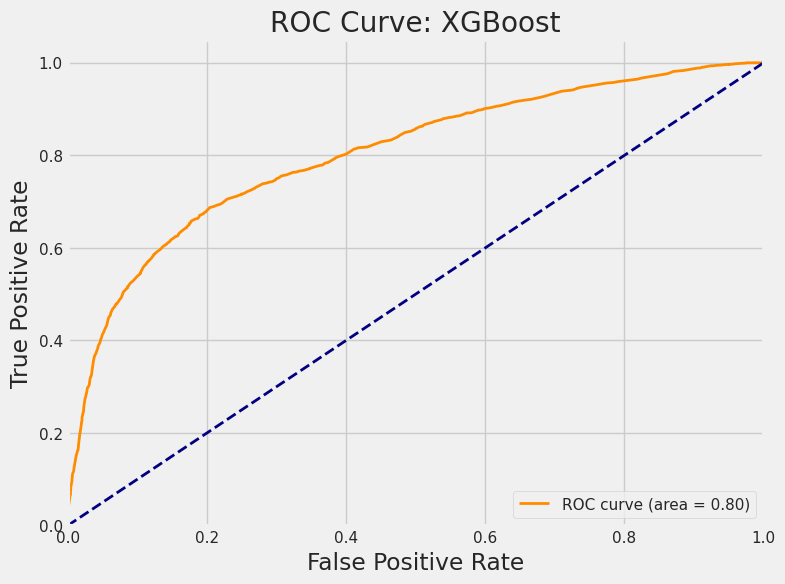

In [ ]:
# Get predicted probabilities
y_pred_proba_xgb = xgb_model.predict_proba(X_test2)[:, 1]

# Compute ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test2_encoded, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100,random_state=123456)
# Train the model
adaboost_model.fit(X_train2, y_train2)
# Make predictions
y_pred2_adaboost = adaboost_model.predict(X_test2)


In [ ]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test2, y_pred2_adaboost))

Classification Report:
                      precision    recall  f1-score   support

        No Severity       0.71      0.81      0.76      4666
Severe Side-effects       0.78      0.67      0.72      4666

           accuracy                           0.74      9332
          macro avg       0.74      0.74      0.74      9332
       weighted avg       0.74      0.74      0.74      9332



In [ ]:
# Calculate and print the accuracy
accuracy_adaboost = accuracy_score(y_test2, y_pred2_adaboost)
print(f'Accuracy: {accuracy_adaboost:.2f}')

Accuracy: 0.74


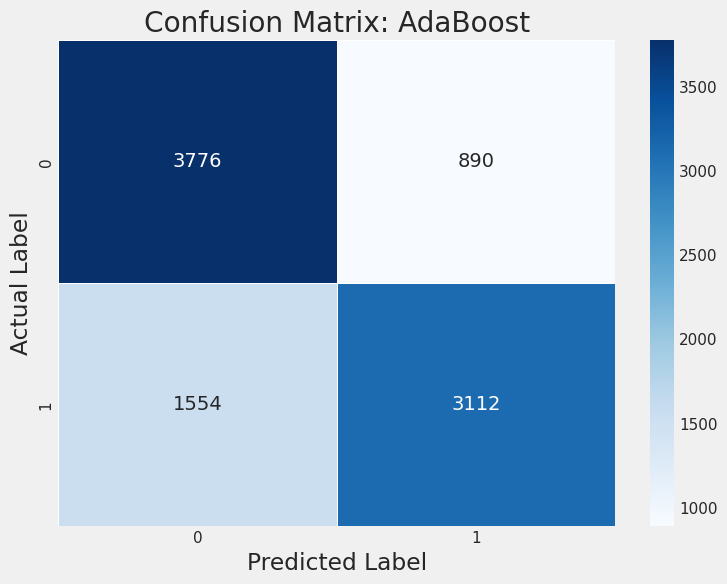

In [ ]:
# Generate the confusion matrix
score1_ada = confusion_matrix(y_test2, y_pred2_adaboost)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(score1_ada, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix: AdaBoost')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


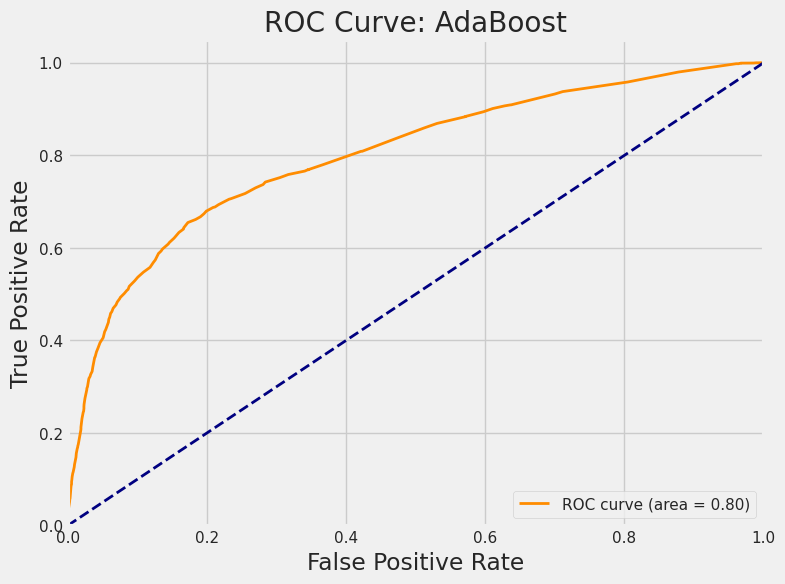

In [ ]:
y_pred_proba_adaboost = adaboost_model.predict_proba(X_test2)[:, 1]
# Compute ROC curve using the numeric labels
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test2_numeric, y_pred_proba_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_adaboost:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: AdaBoost')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Initialize the LightGBM model
lgbm_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=123456, verbose=-1)
# Train the model
lgbm_model.fit(X_train2, y_train2)
# Make predictions
y_pred2_lgbm = lgbm_model.predict(X_test2)

In [ ]:
# Calculate accuracy
accuracy_lgbm = accuracy_score(y_test2, y_pred2_lgbm)
print(f'Accuracy: {accuracy_lgbm:.2f}')


Accuracy: 0.75


In [ ]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test2, y_pred2_lgbm))

Classification Report:
                      precision    recall  f1-score   support

        No Severity       0.71      0.82      0.76      4666
Severe Side-effects       0.79      0.67      0.72      4666

           accuracy                           0.75      9332
          macro avg       0.75      0.75      0.74      9332
       weighted avg       0.75      0.75      0.74      9332



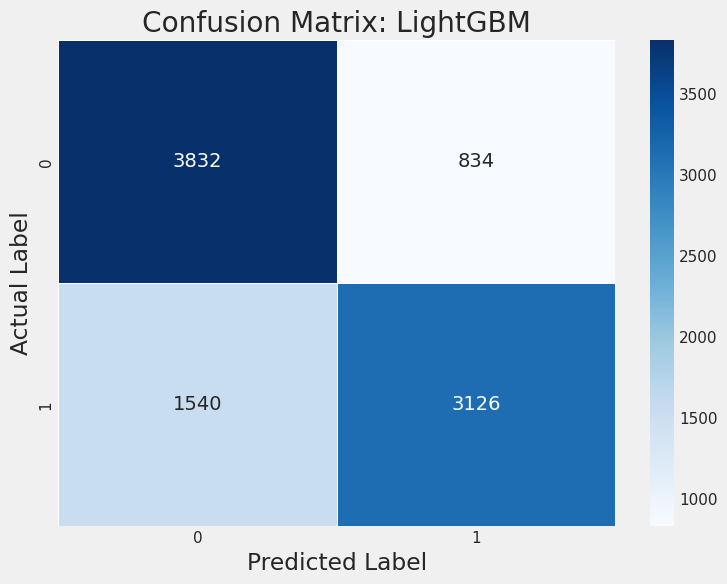

In [ ]:
# Generate the confusion matrix
cm_lgbm = confusion_matrix(y_test2, y_pred2_lgbm)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix: LightGBM')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


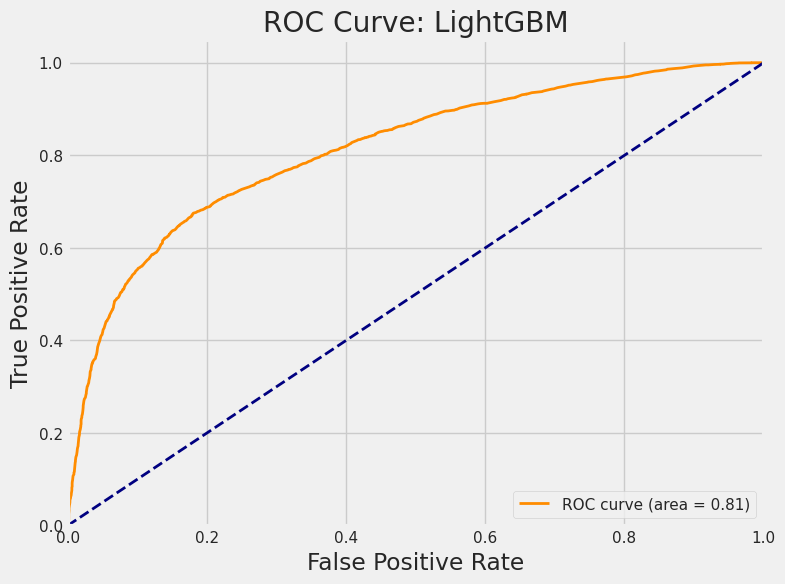

In [ ]:
# Get predicted probabilities
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test2)[:, 1]
# Compute ROC curve using the numeric labels
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test2_numeric, y_pred_proba_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: LightGBM')
plt.legend(loc="lower right")
plt.show()

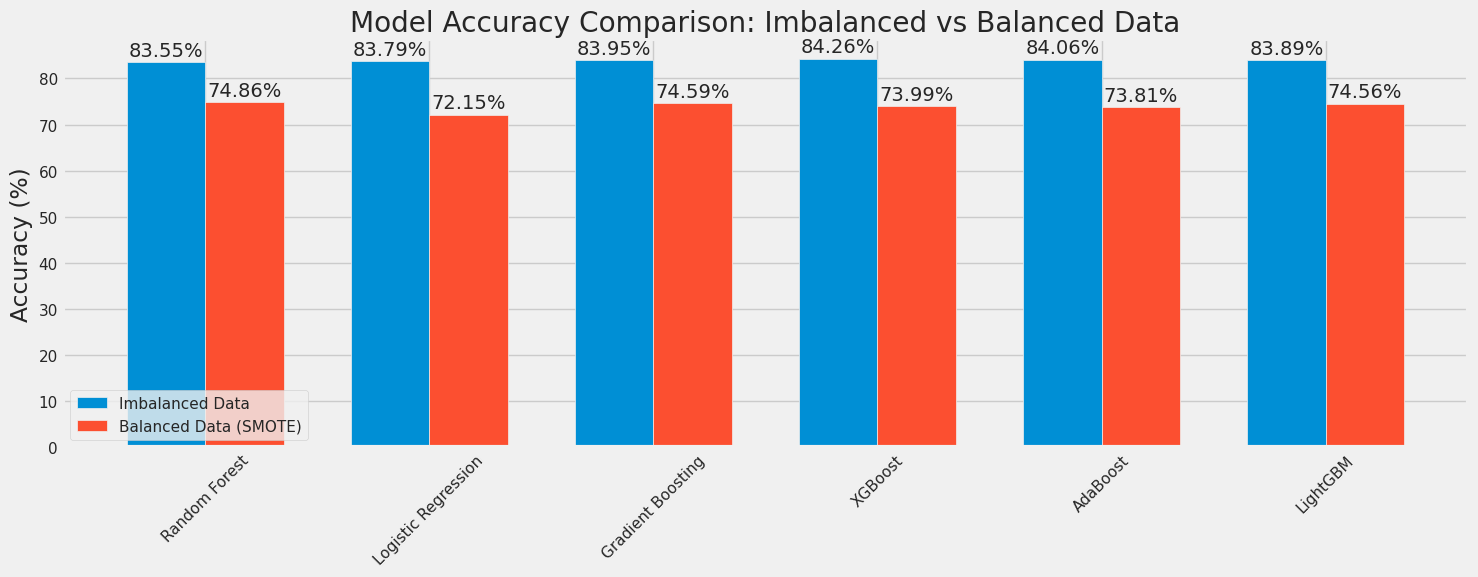

Best Accuracy (Imbalanced Data): XGBoost
Best Accuracy (Balanced Data): Random Forest


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names for comparison
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'AdaBoost', 'LightGBM']

# Accuracies for imbalanced data (in decimals)
accuracy_imbalanced = [accuracy1, accuracy1_logreg, accuracy1_gb, accuracy1_xgb, score_ada, accuracy1_lgbm]

# Accuracies for balanced data (in decimals)
accuracy_balanced = [accuracy2, accuracy2_logreg, accuracy_gb, accuracy2_xgb, accuracy_adaboost, accuracy_lgbm]

# Convert accuracy values to percentages
accuracy_imbalanced = [val * 100 for val in accuracy_imbalanced]
accuracy_balanced = [val * 100 for val in accuracy_balanced]

# Plot Accuracy comparison
plt.figure(figsize=(15, 6))
x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

# Plot bars for imbalanced data
bars1 = plt.bar(x - width/2, accuracy_imbalanced, width, label='Imbalanced Data')

# Plot bars for balanced data
bars2 = plt.bar(x + width/2, accuracy_balanced, width, label='Balanced Data (SMOTE)')

# Add value labels on top of bars in percentages
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{round(yval, 2)}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{round(yval, 2)}%', ha='center', va='bottom')

# Labels, title, and legend
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison: Imbalanced vs Balanced Data')
plt.xticks(x, models)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine the best models for accuracy
best_accuracy_imbalanced = models[np.argmax(accuracy_imbalanced)]
best_accuracy_balanced = models[np.argmax(accuracy_balanced)]

# Print the best accuracy models
print(f'Best Accuracy (Imbalanced Data): {best_accuracy_imbalanced}')
print(f'Best Accuracy (Balanced Data): {best_accuracy_balanced}')


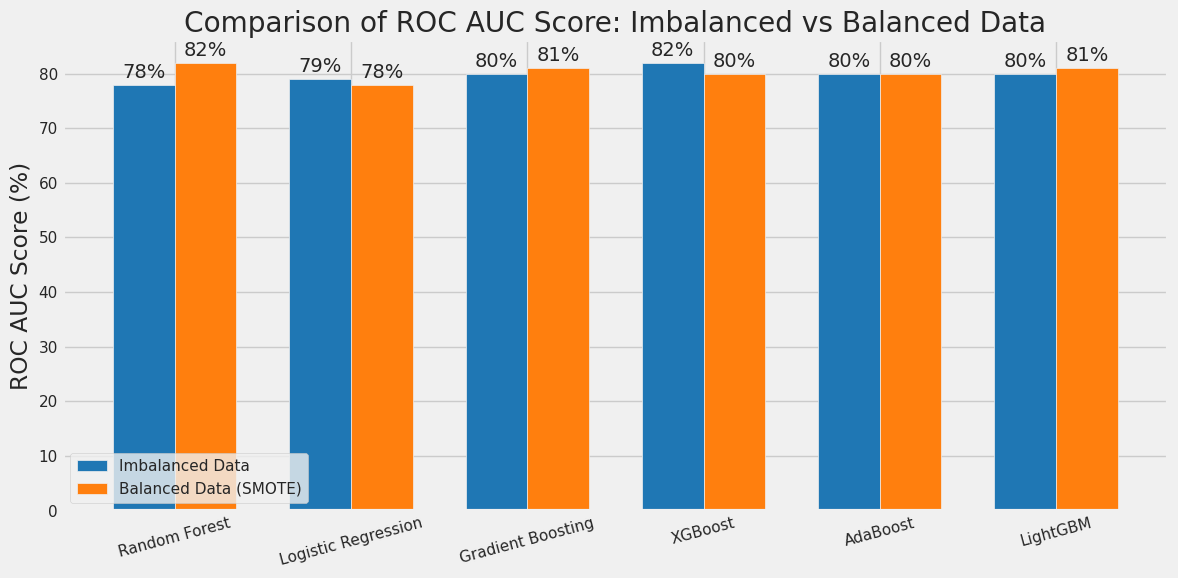

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names for comparison
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'XGBoost', 'AdaBoost', 'LightGBM']

# ROC AUC values for imbalanced data
roc_auc_imbalanced = [78, 79, 80, 82, 80, 80]

# ROC AUC values for balanced data
roc_auc_balanced = [82, 78, 81, 80, 80, 81]

# Set up the bar chart
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Custom colors (Blue for Imbalanced, Orange for Balanced)
color_imbalanced = '#1f77b4'  # Blue color
color_balanced = '#ff7f0e'    # Orange color

# Create the figure and axes
plt.figure(figsize=(12, 6))

# Plot bars for imbalanced data
bars1 = plt.bar(x - width/2, roc_auc_imbalanced, width, label='Imbalanced Data', color=color_imbalanced)

# Plot bars for balanced data
bars2 = plt.bar(x + width/2, roc_auc_balanced, width, label='Balanced Data (SMOTE)', color=color_balanced)

# Add labels, title, and custom x-axis tick labels
plt.ylabel('ROC AUC Score (%)')
plt.title('Comparison of ROC AUC Score: Imbalanced vs Balanced Data')
plt.xticks(x, models, rotation=15)
plt.legend(loc='best')

# Add value labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### We've now equalized the two classes. This should help reduce class bias and improve our models.

###                             Linear Regression Modeling

###Is there a relationship between the number of days to show symptoms and the number of symptoms caused by the vaccines?
###Null Hypothesis: There is no relationship between 'numdays' and symptom count.
###Alternative Hypothesis: There is a relationship between 'numdays' and symptom count.

In [ ]:
# Create a linear regression model. IV = 'numdays' DV = 'symptom_count'
# Can we predict symptom count based upon the number of days from vaccination to onset?

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

X_lin = covid_df2[['numdays']]
y_lin = covid_df2['symptom_count']

X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.20, random_state=0)
linreg.fit(X_train_lin,y_train_lin)
predicted_lin = linreg.predict(X_test_lin)
expected_lin = y_test_lin

In [ ]:
# Evaluation of the Linear Regression Model
# The coefficient
print("Coefficients: \n", linreg.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(expected_lin, predicted_lin)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % metrics.r2_score(expected_lin, predicted_lin))

Coefficients: 
 [-0.01809771]
Root mean squared error: 3.41
Coefficient of determination: -0.00045


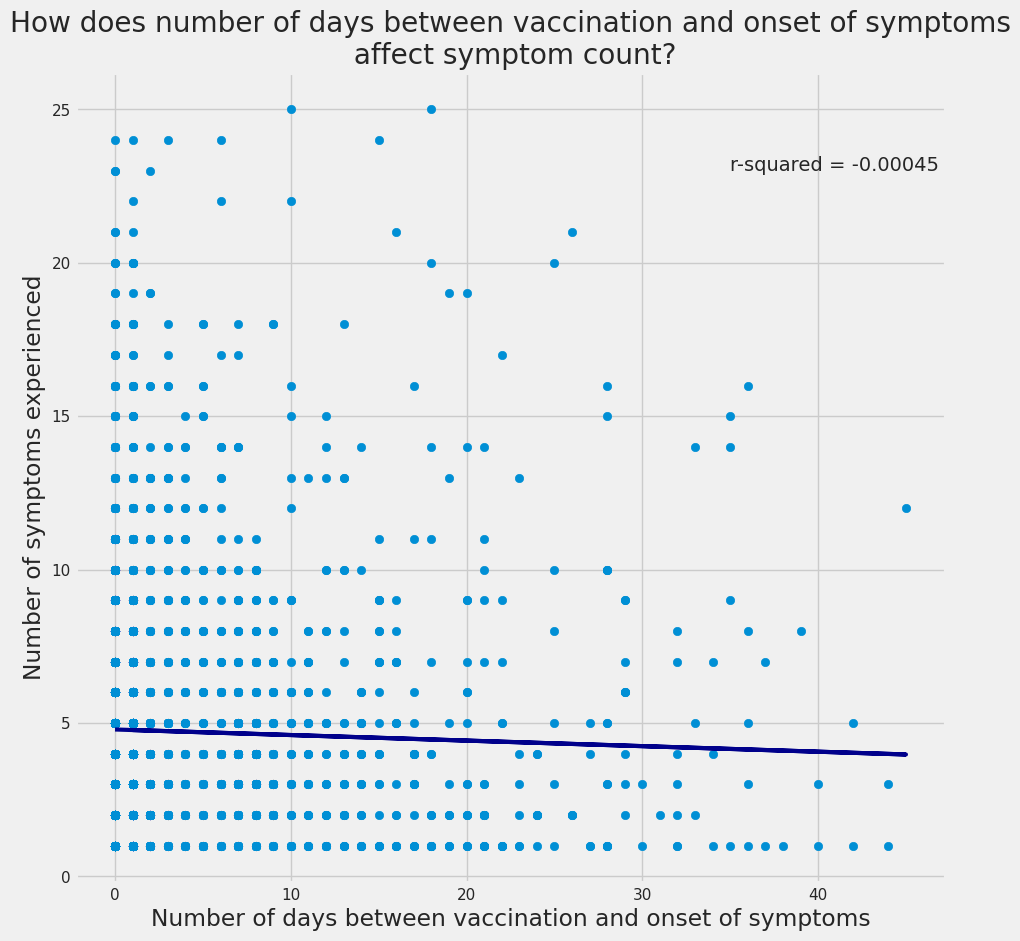

In [ ]:
# Create a graph of numdays vs. symptom count + regression line of fit

plt.style.use('fivethirtyeight')
plt.scatter(X_test_lin,y_test_lin)
plt.plot(X_test_lin,predicted_lin, color='darkblue', lw=3)
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Number of symptoms experienced')
plt.title('How does number of days between vaccination and onset of symptoms\n affect symptom count?')
plt.annotate("r-squared = {:.5f}".format(metrics.r2_score(expected_lin, predicted_lin)), (35, 23))
plt.show()

###There doesn't seem to be much of a linear relationship between the two variables. Let's try creating a regression model of degree 3 (cubic) and see if that does any better.

In [ ]:
# Create a polynomial regression model based on degree=3

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X_poly = np.array(covid_df2['numdays'].values)
y_poly = np.array(covid_df2['symptom_count'].values)

# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=3)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_poly.reshape(-1,1),y_poly.reshape(-1,1))
poly_pred=pipe.predict(X_poly.reshape(-1,1))

# sorting predicted values with respect to predictor
sorted_zip = sorted(zip(X_poly,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

In [ ]:
# Evaluation of the Polynomial (cubic) Regression Model

# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(metrics.mean_squared_error(y_poly, poly_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.5f" % metrics.r2_score(y_poly, poly_pred))

Root mean squared error: 3.47
Coefficient of determination: -0.00261


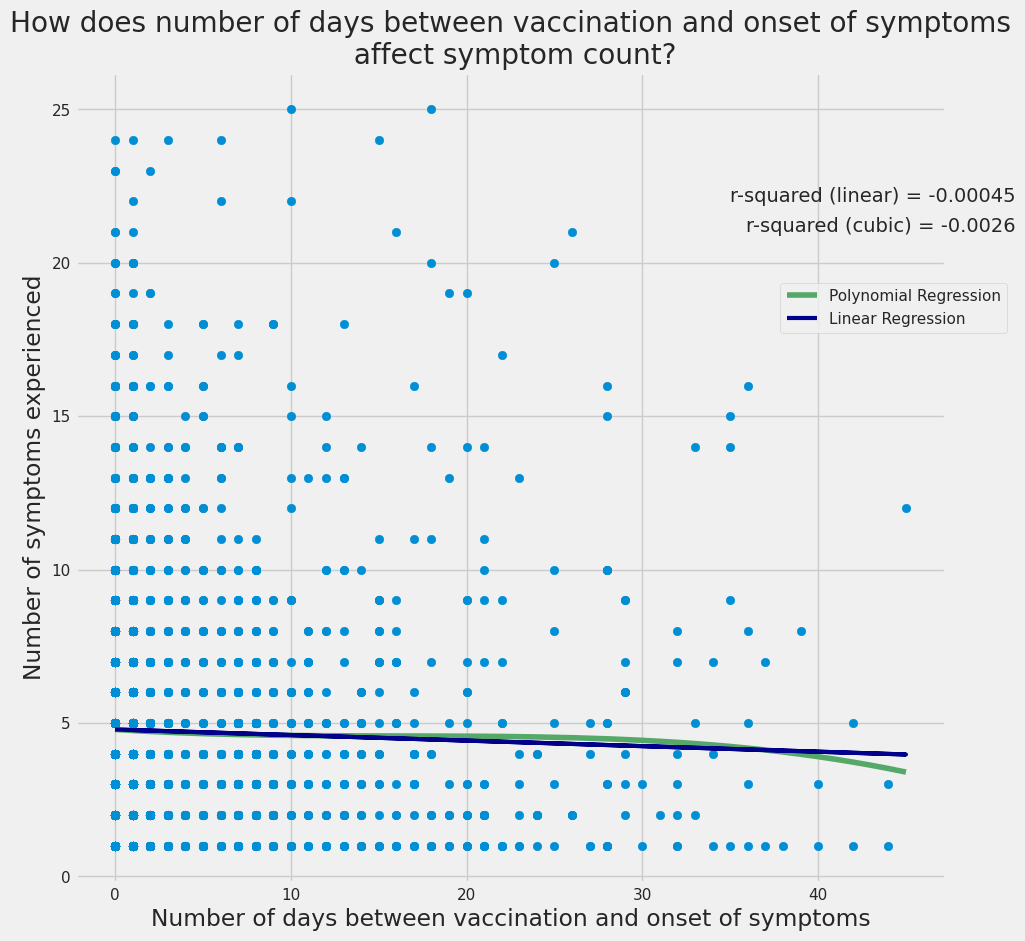

In [ ]:
# Plotting predictions for linear and cubic fit regression

plt.style.use('fivethirtyeight')
plt.scatter(X_test_lin,y_test_lin)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.plot(X_test_lin,predicted_lin, color='darkblue', lw=3, label='Linear Regression')
plt.xlabel('Number of days between vaccination and onset of symptoms')
plt.ylabel('Number of symptoms experienced')
plt.title('How does number of days between vaccination and onset of symptoms\n affect symptom count?')
plt.annotate("r-squared (linear) = {:.5f}".format(metrics.r2_score(expected_lin, predicted_lin)), (35, 22))
plt.annotate("r-squared (cubic) = {:.4f}".format(metrics.r2_score(y_poly, poly_pred)), (35.9, 21))
plt.legend(loc='upper right', bbox_to_anchor=(1.08,.75))
plt.show()

###The cubic fit model still struggles to fit the data. This is likely due to the high concentration of data in the lower left quadrant of the above graph where 'numdays' and symptom count are less than 10.

###Let's test this relationship for significance via a correlation test. First we will test each variable for normality.

In [ ]:
# Reject the null hypothesis that the data comes from a normal distribution
# which means numdays is non-parametric

from scipy import stats
stats.normaltest(covid_df2['numdays'])

NormaltestResult(statistic=np.float64(21296.971938060684), pvalue=np.float64(0.0))

In [ ]:
# Reject the null hypothesis that the data comes from a normal distribution
# which means symptom_count is non-parametric

stats.normaltest(covid_df2['symptom_count'])

NormaltestResult(statistic=np.float64(10260.897636006532), pvalue=np.float64(0.0))

###Because our data is non-parametric, we need to use a spearman rank or kendall's correlation test to test our hypothesis

In [ ]:
print(stats.spearmanr(covid_df2['numdays'],covid_df2['symptom_count']))
print(stats.kendalltau(covid_df2['numdays'],covid_df2['symptom_count']))

SignificanceResult(statistic=np.float64(-0.02407431382474003), pvalue=np.float64(3.798920506484018e-05))
SignificanceResult(statistic=np.float64(-0.018973098419589215), pvalue=np.float64(2.812427636650006e-05))


###Note both tests claim evidence for a significant relationship between the two variables. Thus, we reject the null the hypothesis and say there is a significant relationship between 'numdays' and symptom count. This relationship is a very weak inverse relationship given the correlation coefficient. As 'numdays' increases, symptom count decreases (ever so slightly).

###Nonparametric Statistical Tests

###Research Question: Is there a significant difference in age between patients who experienced no severe effects and patients who did experience severe side-effects?
###Null Hypothesis: There is no difference in age between patients who experienced no severe side-effects and patients who experienced severe side-effects.
###Alternative Hypothesis: There is a significant difference in age between patients who experienced no severe side-effects and patients who experienced severe side-effects.

In [ ]:
covid_age_sev = covid_df2[['age_yrs','sex','severity','severity_type']]

In [ ]:
covid_age_sev.head()

,age_yrs,sex,severity,severity_type
0,33.0,F,0,No Severity
1,73.0,F,0,No Severity
2,23.0,F,0,No Severity
3,58.0,F,0,No Severity
4,47.0,F,0,No Severity


In [ ]:
# Split the dataframe into two groups: No severity and severity. Subset just the age variable

No_Severity_age = covid_age_sev[covid_age_sev['severity'] == 0]['age_yrs']
Severity_age = covid_age_sev[covid_age_sev['severity'] == 1]['age_yrs']

In [ ]:
# Normality test for no severity age
# P-value is significant so no-severity_age is non-gaussian
stats.normaltest(No_Severity_age)

NormaltestResult(statistic=np.float64(737.0026831441871), pvalue=np.float64(9.160111947441657e-161))

In [ ]:
# P-value is significant so severity age is non-gaussian
stats.normaltest(Severity_age)

NormaltestResult(statistic=np.float64(450.82866193775004), pvalue=np.float64(1.2699888800188004e-98))


###Both groups age distributions are non-Gaussian so we will use a Mann-Whitney U test to find any difference in age between the two groups

In [ ]:
# Conduct mann whitney test to test for significant difference between the two groups
stats.mannwhitneyu(No_Severity_age,Severity_age)

MannwhitneyuResult(statistic=np.float64(32459234.0), pvalue=np.float64(0.0))

In [ ]:
No_Severity_age.describe()

,age_yrs
count,23329.000000
mean,47.431866
std,16.040632
min,0.000000
25%,35.000000
50%,46.000000
75%,58.000000
max,115.000000


In [ ]:
Severity_age.describe()

,age_yrs
count,5944.000000
mean,65.932705
std,19.470628
min,1.000000
25%,52.000000
50%,70.000000
75%,81.000000
max,106.000000


###Per the Mann-Whitney U test, there is a significant difference in age between those who did not experience severe side-effects and those who did. From the descriptive statistics above, we see the average age of the 'No Severity' group is much lower than that of the 'Severity' group.


###Let's try to visualize this difference in age.

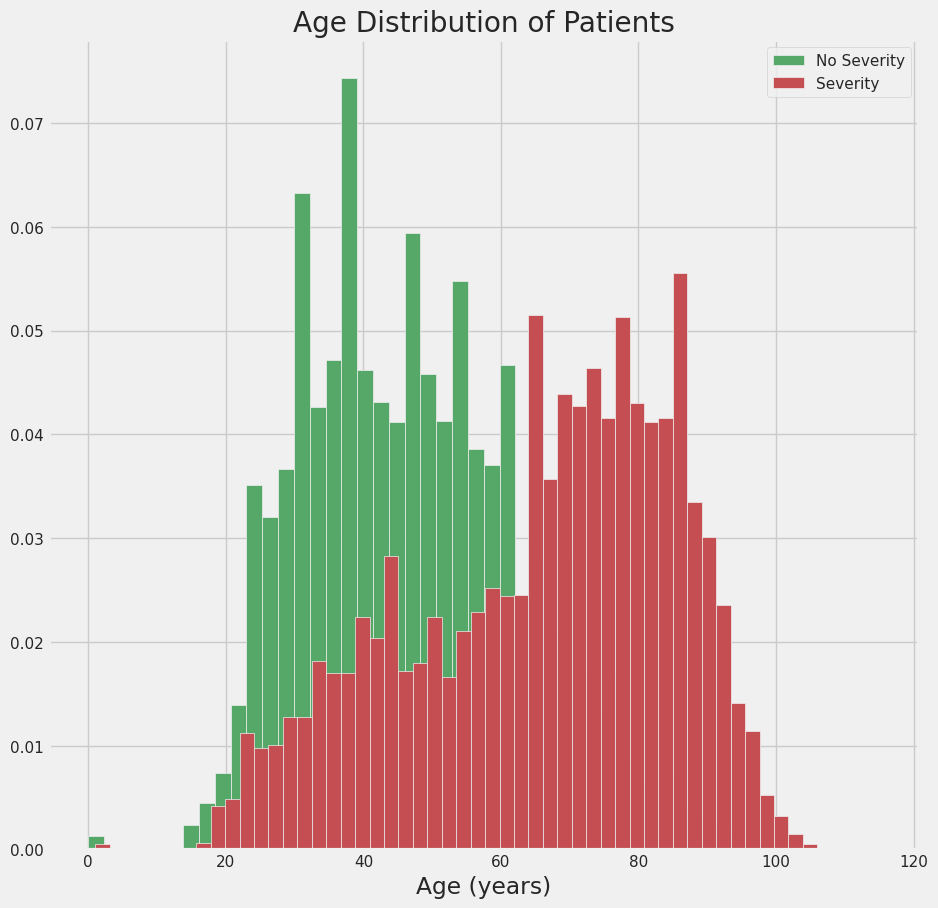

In [ ]:
# Age distribution visual grouped by no severity and severity

plt.hist(No_Severity_age, bins=50, weights = np.array(len(No_Severity_age)*[1.0])/len(No_Severity_age),color='g', label = 'No Severity')
plt.hist(Severity_age, bins=50, weights = np.array(len(Severity_age)*[1.0])/len(Severity_age),color='r', label = 'Severity')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.legend()
plt.show()

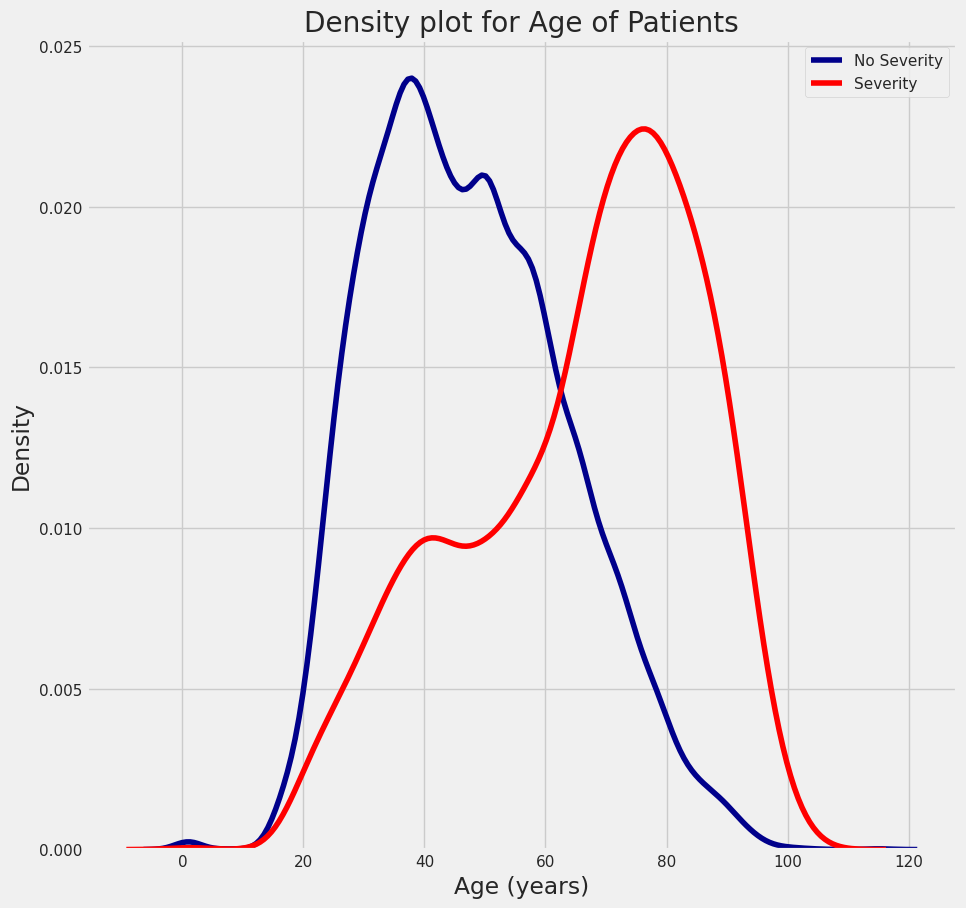

In [ ]:
# Density plot of age split by no severity and severity groups using kdeplot
sns.kdeplot(No_Severity_age, color='darkblue', linewidth=4, label='No Severity')
sns.kdeplot(Severity_age, color='red', linewidth=4, label='Severity')

# Labels and title
plt.xlabel('Age (years)')
plt.legend()
plt.title('Density plot for Age of Patients')
plt.show()


###CONCLUSION:
###1 - After balancing the two classes, random forest was most accurately able to classify whether a patient may experience severe side-effects or not based on age, gender, vaccine manufacturer and medical history.
###2 - There is a very weak, inverse relationship between number of days from vaccination to onset and symptom count. As 'numdays' increases, symptom count decreases very slightly.
##3 - There is a significant difference in age of patients between those who experienced severe side-effects and those who did not.